# **Acerca del Conjunto de Datos: Detección de Intrusiones en Ciberseguridad**

Este conjunto de datos de **Detección de Intrusiones en Ciberseguridad** está diseñado para identificar intrusiones cibernéticas en función del tráfico de red y el comportamiento del usuario. A continuación, se detalla la estructura del conjunto de datos, la importancia de las características, los posibles enfoques de análisis y su aplicación en **aprendizaje automático**.

## **1. Comprensión de las Características**

El conjunto de datos está compuesto por características relacionadas con la **red** y el **comportamiento del usuario**, proporcionando información valiosa sobre posibles amenazas cibernéticas.

### A. Características Basadas en la Red
Estas características describen información a nivel de red, como el tamaño de los paquetes, el tipo de protocolo y los métodos de cifrado.

- **network_packet_size (Tamaño del Paquete en Bytes)**

    - Representa el tamaño de los paquetes de red, que oscila entre **64 y 1500 bytes**.
    - Los paquetes pequeños (~64 bytes) pueden indicar **mensajes de control**, mientras que los más grandes (~1500 bytes) suelen transportar **datos masivos**.
    - Los atacantes pueden utilizar paquetes anormalmente **pequeños o grandes** para realizar **reconocimiento** o **intentos de explotación**.

- **protocol_type (Protocolo de Comunicación)**

    - Indica el protocolo utilizado en la sesión: **TCP**, **UDP** o **ICMP**.

      - **TCP (Transmission Control Protocol):** Confiable y orientado a conexión (usado en **HTTP, HTTPS, SSH**).
      - **UDP (User Datagram Protocol):** Más rápido pero menos confiable (utilizado en **VoIP** y **streaming**).
      - **ICMP (Internet Control Message Protocol):** Empleado para **diagnóstico de red** (como **ping**); a menudo abusado en ataques **DoS (Denial-of-Service)**.

- **encryption_used (Protocolo de Cifrado)**

    - Valores posibles: **AES**, **DES**, **None**.

      - **AES (Advanced Encryption Standard):** Cifrado fuerte y comúnmente utilizado.
      - **DES (Data Encryption Standard):** Cifrado más antiguo con **seguridad débil**.
      - **None:** Comunicación **no cifrada**, que puede ser **riesgosa**.

    - Los atacantes pueden utilizar **sin cifrado** para **evadir la detección** o cifrados **débiles** para **explotar vulnerabilidades**.

### B. Características Basadas en el Comportamiento del Usuario
Estas características rastrean actividades del usuario, como los intentos de inicio de sesión y la duración de la sesión.

- **login_attempts (Número de Inicios de Sesión)**

    - Valores altos pueden indicar **ataques de fuerza bruta** (múltiples intentos de inicio).
    - Los usuarios normales tienen de **1 a 3 intentos**, mientras que un ataque puede tener **cientos o miles**.

- **session_duration (Duración de la Sesión en Segundos)**

    - Una sesión muy larga podría indicar **acceso no autorizado** o intentos de **persistencia**.
    - Los atacantes pueden permanecer conectados durante más tiempo para **mantener el acceso**.

- **failed_logins (Intentos de Inicio de Sesión Fallidos)**

    - Un alto número de intentos fallidos indica **ataques de diccionario** o **credential stuffing**.
    - Muchos intentos fallidos seguidos de un inicio exitoso podrían sugerir una **cuenta comprometida**.

- **unusual_time_access (Anomalía de Tiempo de Acceso)**

    - Una **bandera binaria** (0 o 1) que indica si el acceso ocurrió en un **horario inusual**.
    - Los atacantes a menudo operan **fuera del horario laboral** para **evadir la detección**.

- **ip_reputation_score (Reputación de la Dirección IP)**

    - Un **puntaje de 0 a 1**, donde los valores más altos indican **actividad sospechosa**.
    - Las direcciones IP asociadas con **botnets**, **spam** o **ataques previos** tienden a tener **puntajes altos**.

- **browser_type (Tipo de Navegador)**

    - Navegadores comunes: **Chrome**, **Firefox**, **Edge**, **Safari**.
    - **Unknown**: Puede indicar **scripts automatizados** o **bots**.

## **2. Variable Objetivo (attack_detected)**

- Clasificación binaria:

    - **1**: Se detectó un **ataque**.
    - **0**: Actividad **normal**.

- Es útil para **aprendizaje supervisado**, donde un modelo aprende de patrones de ataques etiquetados.

## **3. Casos de Uso Posibles**

El conjunto de datos se puede utilizar para **sistemas de detección de intrusiones (IDS)** e investigación en **ciberseguridad**.

### A. Detección de Intrusiones con Aprendizaje Automático

- **Enfoques de Aprendizaje Supervisado:**

    - Modelos de clasificación: **Regresión Logística**, **Árboles de Decisión**, **Random Forest**, **XGBoost**, **SVM**.
    - Evaluar con **exactitud (accuracy)**, **precisión**, **recuperación (recall)** y **F1-score**.

- **Enfoques de Aprendizaje Profundo:**

    - Usar **Redes Neuronales (DNN)**, **LSTM**, **CNN** para el reconocimiento de patrones.
    - **LSTM** es adecuado para el **análisis de tráfico basado en series temporales**.

### B. Detección de Anomalías (Aprendizaje No Supervisado)

    - **Autoencoders**: Aprenden el tráfico normal y detectan anomalías.
    - **Isolation Forest**: Detecta valores atípicos aislando características.
    - **One-Class SVM**: Aprende el comportamiento normal y detecta desviaciones.

### C. Detección Basada en Reglas

Si se superan ciertos **umbrales** (por ejemplo, `failed_logins > 10` y `ip_reputation_score > 0.8`), se activa una **alerta**.

## **4. Desafíos y Consideraciones**

- **Ataques Adversariales:** Los atacantes pueden modificar el tráfico para **evadir la detección**.
- **Deriva de Concepto:** Las amenazas evolucionan, lo que requiere una **actualización continua del modelo**.
- **Falsos Positivos y Negativos:** Es necesario **equilibrar** la detección de amenazas reales y la **reducción de alertas innecesarias**.



In [26]:
import pandas as pd

df=pd.read_csv('cybersecurity_intrusion_data.csv')

df.head(10)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
5,SID_00006,453,UDP,5,380.471550,AES,0.422486,2,Chrome,1,0
6,SID_00007,815,ICMP,4,728.107165,AES,0.413772,1,Chrome,0,1
7,SID_00008,653,TCP,3,12.599906,DES,0.097719,3,Chrome,1,1
8,SID_00009,406,TCP,2,542.558895,NaN,0.294580,0,Chrome,1,0
9,SID_00010,608,UDP,6,531.944107,NaN,0.424117,1,Chrome,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [28]:
df.isnull().sum() #Pueden ser conexiones que no estaban encriptadas

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [29]:
df.duplicated().sum() #No hay duplicados

0

In [30]:
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [31]:
print(df.size)


104907


In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# === TRANSFORMACIÓN DE DATOS ===
# Imputación de valores faltantes en encryption_used
df['encryption_used'].fillna('None', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13496\427473495.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['encryption_used'].fillna('None', inplace=True)


In [33]:
# Codificación de variables categóricas
label_encoders = {}
categorical_features = ['protocol_type', 'encryption_used', 'browser_type']
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardar para revertir si es necesario



In [34]:
# Crear nuevas variables derivadas
df['failed_login_ratio'] = df['failed_logins'] / (df['login_attempts'] + 1)
df['avg_packet_size'] = df['network_packet_size'] / (df['session_duration'] + 1)



In [35]:
# Normalización de variables numéricas
scaler = StandardScaler()
numeric_features = ['network_packet_size', 'session_duration', 'ip_reputation_score']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   float64
 2   protocol_type        9537 non-null   int32  
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      9537 non-null   int32  
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   int32  
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
 11  failed_login_ratio   9537 non-null   float64
 12  avg_packet_size      9537 non-null   float64
dtypes: float64(5), int32(3), int64(4), object(1)
memory usage: 857.0+ KB


In [37]:
df.head(10)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected,failed_login_ratio,avg_packet_size
0,SID_00001,0.496899,1,4,-0.381125,1,1.554930,1,1,0,1,0.200000,1.212592
1,SID_00002,-0.143322,1,3,0.972960,1,-0.168029,0,2,0,0,0.000000,0.302759
2,SID_00003,0.648132,1,3,-0.912503,1,2.301950,2,0,0,1,0.500000,8.271499
3,SID_00004,1.530327,2,4,-0.243473,1,-1.174443,0,4,0,1,0.000000,1.334996
4,SID_00005,-0.239103,1,5,-0.330830,0,-1.560484,1,2,0,0,0.166667,0.849045
5,SID_00006,-0.239103,2,5,-0.524175,0,0.514478,2,0,1,0,0.333333,1.187507
6,SID_00007,1.585779,0,4,-0.082183,0,0.465293,1,0,0,1,0.200000,1.117806
7,SID_00008,0.769119,1,3,-0.991897,1,-1.318646,3,0,1,1,0.750000,48.015038
8,SID_00009,-0.476035,1,2,-0.318093,2,-0.207480,0,0,1,0,0.000000,0.746929
9,SID_00010,0.542269,2,6,-0.331589,2,0.523683,1,0,0,0,0.142857,1.140833


In [38]:
#Chrome:0
#Edge:1
#Firefox:2
#Safari:3
#Unknow:4

In [39]:
df['ip_reputation_score'].head(10)

0    1.554930
1   -0.168029
2    2.301950
3   -1.174443
4   -1.560484
5    0.514478
6    0.465293
7   -1.318646
8   -0.207480
9    0.523683
Name: ip_reputation_score, dtype: float64

# Análisis de Detección de Intrusiones en Ciberseguridad: Hallazgos Clave

## Introducción

El presente análisis examina un conjunto de datos de ciberseguridad enfocado en la detección de intrusiones, compuesto por 9,537 registros con 13 variables que capturan aspectos del tráfico de red y comportamiento de usuarios. Este informe busca exponer los patrones revelados en el dashboard y su relevancia para la identificación de actividades maliciosas.

## Estructura del Conjunto de Datos

Los datos analizados comprenden 9,537 sesiones con las siguientes variables:

```
- session_id: Identificador único para cada sesión
- network_packet_size: Tamaño de los paquetes intercambiados (float64)
- protocol_type: Tipo de protocolo utilizado (int32)
- login_attempts: Número de intentos de inicio de sesión (int64)
- session_duration: Duración de la sesión en segundos (float64)
- encryption_used: Tipo de cifrado empleado (int32)
- ip_reputation_score: Puntuación de reputación de la dirección IP (float64)
- failed_logins: Número de inicios de sesión fallidos (int64)
- browser_type: Navegador utilizado (int32)
- unusual_time_access: Indicador de acceso en horario inusual (int64)
- attack_detected: Clasificación de la sesión como ataque o normal (int64)
- failed_login_ratio: Proporción de inicios fallidos respecto a intentos totales (float64)
- avg_packet_size: Tamaño promedio de paquetes durante la sesión (float64)
```

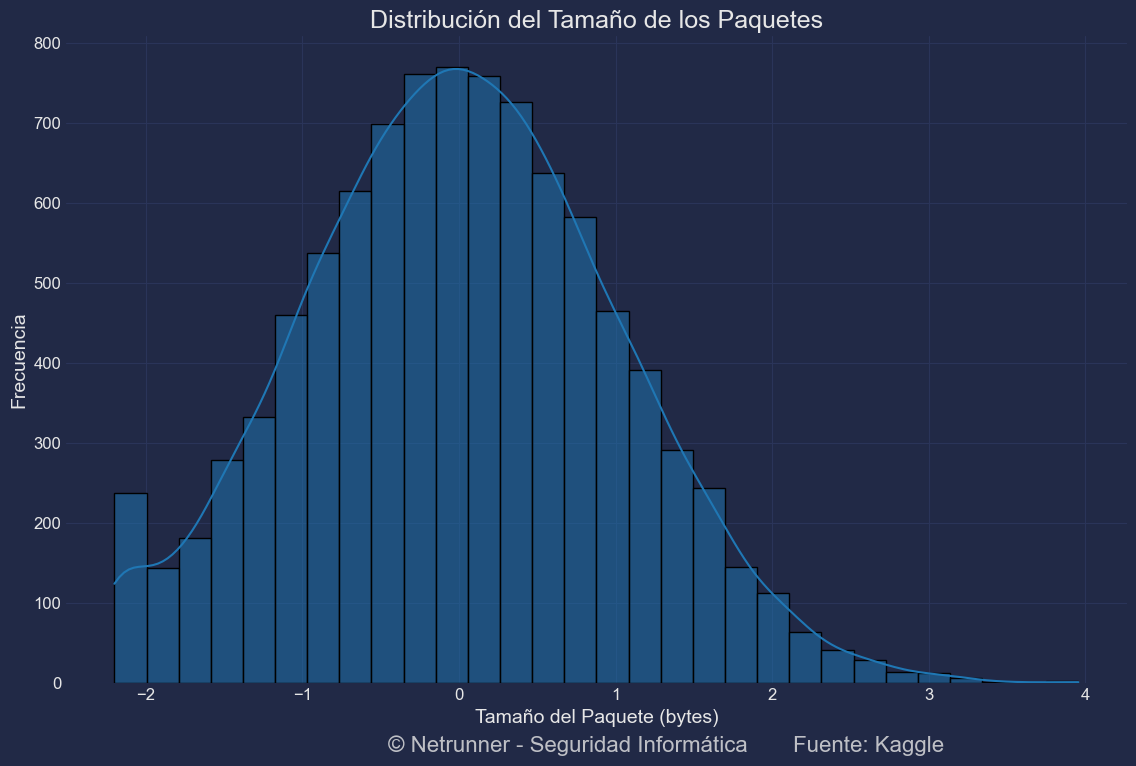

In [40]:
# Estilo profesional
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")

# Configuración de fuente Arial
plt.rcParams['font.family'] = 'Arial'

# Función para agregar copyright
def agregar_copyright(fig):
    fig.text(0.5, 0.02, "© Netrunner - Seguridad Informática", ha='center', fontsize=16, alpha=0.8)
    fig.text(0.75, 0.02, "Fuente: Kaggle", ha='center', fontsize=16, alpha=0.8)

# 1. Distribución del tamaño de los paquetes
plt.figure(figsize=(12, 8))
sns.histplot(df['network_packet_size'], bins=30, kde=True, color='#1f77b4')
plt.title("Distribución del Tamaño de los Paquetes", fontsize=18)
plt.xlabel("Tamaño del Paquete (bytes)", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout(pad=3)
agregar_copyright(plt.gcf())
plt.savefig("1_distribucion_tamano_paquetes.png", dpi=300, bbox_inches='tight')
plt.show()

## Hallazgos del Análisis Exploratorio

### 1. Distribución del Tamaño de Paquetes

El histograma de tamaño de paquetes muestra una distribución aproximadamente normal, con la mayoría de los paquetes concentrados entre -2 y 4 bytes (en escala normalizada). Esta distribución revela que:

- Existe un tamaño estándar predominante de paquetes en las comunicaciones normales
- Los valores atípicos en los extremos podrían indicar técnicas de evasión (paquetes muy pequeños) o exfiltración de datos (paquetes anormalmente grandes)

Según la documentación del conjunto de datos, los paquetes en el rango normal oscilan entre 64 y 1500 bytes. Los paquetes fuera de este rango merecen mayor atención, ya que podrían representar intentos de reconocimiento o explotación.



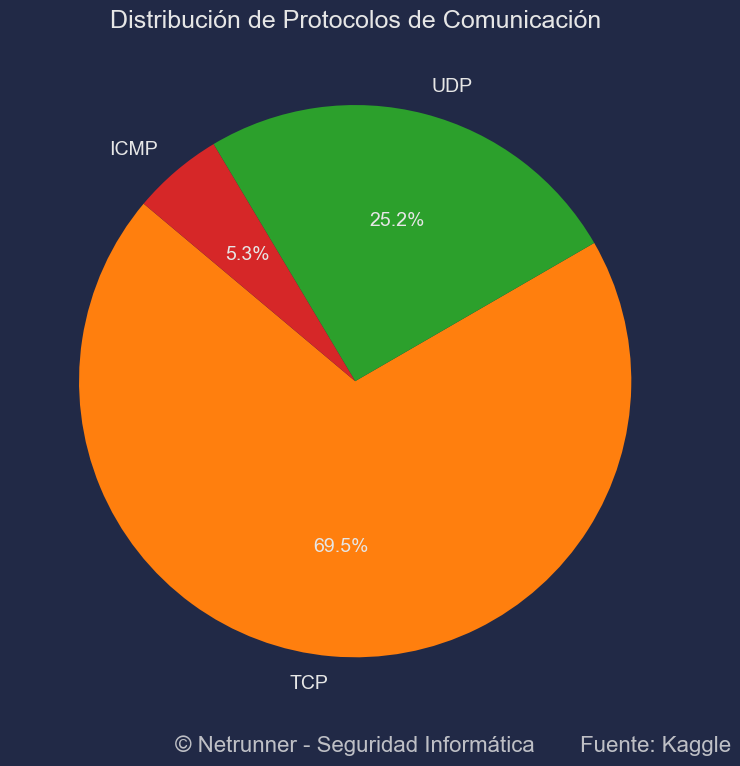

In [41]:
# 2. Proporción de protocolos de comunicación
plt.figure(figsize=(12, 8))
# Diccionario de mapeo de protocolos
protocol_mapping = {0: 'ICMP', 1: 'TCP', 2: 'UDP'}

# Contar la frecuencia de cada protocolo
protocol_counts = df['protocol_type'].value_counts()

# Reemplazar los valores numéricos con los nombres correspondientes
protocol_labels = [protocol_mapping.get(proto, f"Desconocido ({proto})") for proto in protocol_counts.index]

plt.pie(protocol_counts, labels=protocol_labels, autopct='%1.1f%%', startangle=140, 
       colors=['#ff7f0e', '#2ca02c', '#d62728'], textprops={'fontsize': 14})
plt.title("Distribución de Protocolos de Comunicación", fontsize=18)
plt.tight_layout(pad=3)
agregar_copyright(plt.gcf())
plt.savefig("2_distribucion_protocolos.png", dpi=300, bbox_inches='tight')
plt.show()



### 2. Distribución de Protocolos de Comunicación
El gráfico circular muestra una clara predominancia de:

* TCP: 69.5% de las sesiones
* UDP: 25.2% de las sesiones
* ICMP: 5.3% de las sesiones

La alta proporción de TCP es esperada para tráfico web normal. El porcentaje de UDP (25.2%) también es consistente con patrones de tráfico habituales, ya que este protocolo se utiliza comúnmente para aplicaciones como streaming de video, VoIP, juegos online y DNS. La presencia de ICMP (5.3%) se encuentra dentro de rangos normales para diagnósticos de red y no sugiere por sí misma actividades de reconocimiento o comunicaciones encubiertas.


C:\Users\User\AppData\Local\Temp\ipykernel_13496\2906372163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['attack_detected'], y=df['login_attempts'], palette='coolwarm')


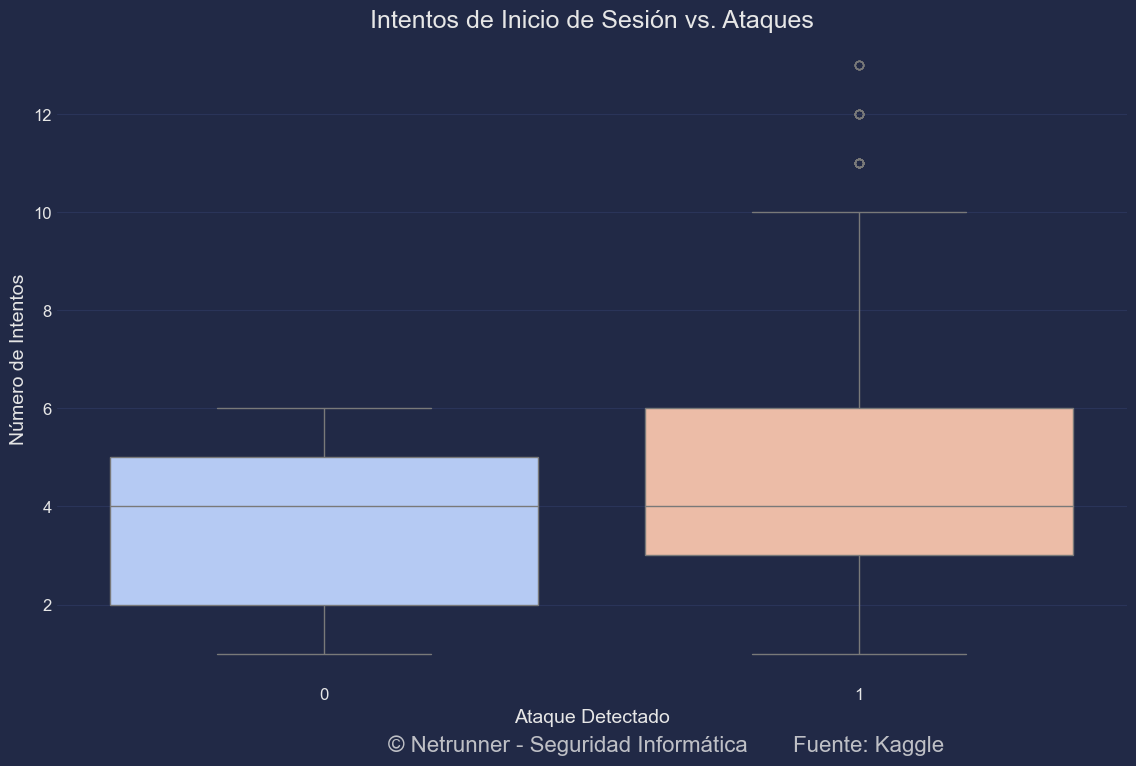

In [42]:
# 3. Intentos de inicio de sesión vs. ataques detectados
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['attack_detected'], y=df['login_attempts'], palette='coolwarm')
plt.title("Intentos de Inicio de Sesión vs. Ataques", fontsize=18)
plt.xlabel("Ataque Detectado", fontsize=14)
plt.ylabel("Número de Intentos", fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout(pad=3)
agregar_copyright(plt.gcf())
plt.savefig("3_intentos_sesion_vs_ataques.png", dpi=300, bbox_inches='tight')
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_13496\874714643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='attack_detected', y='login_attempts', data=df, palette='coolwarm')


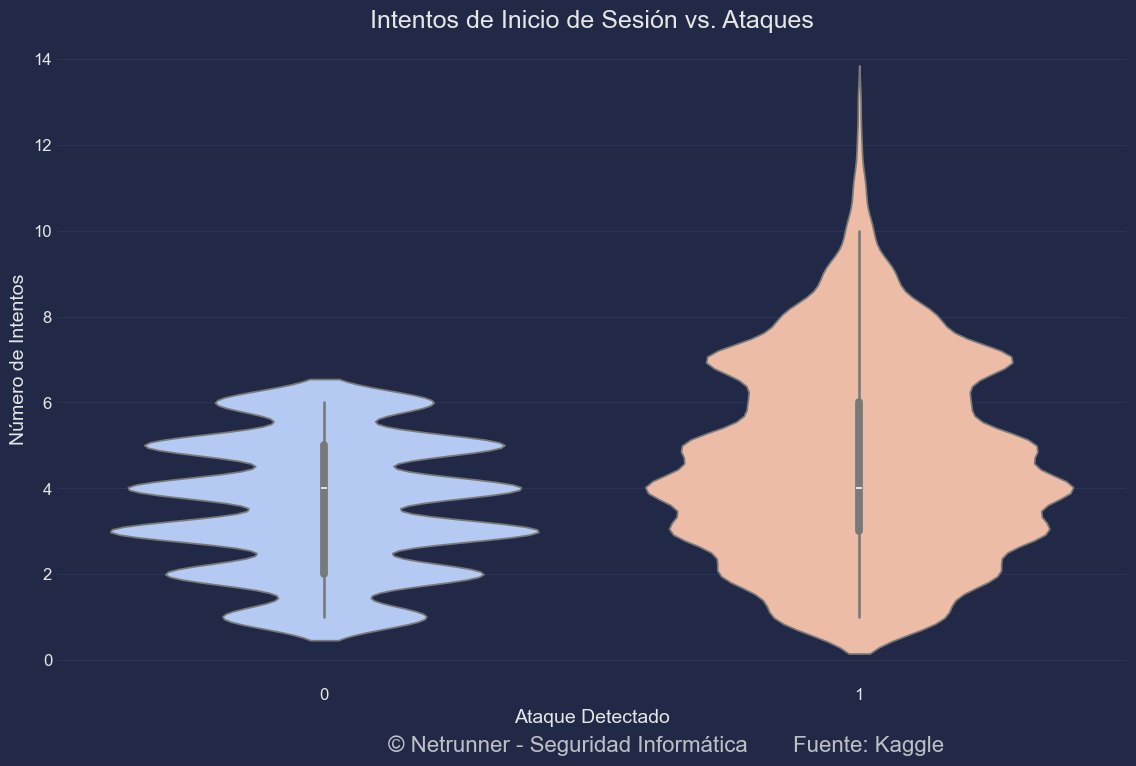

In [43]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='attack_detected', y='login_attempts', data=df, palette='coolwarm')
plt.title("Intentos de Inicio de Sesión vs. Ataques", fontsize=18)
plt.xlabel("Ataque Detectado", fontsize=14)
plt.ylabel("Número de Intentos", fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout(pad=3)
agregar_copyright(plt.gcf())
plt.savefig("3_violin_intentos_sesion_vs_ataques.png", dpi=300, bbox_inches='tight')
plt.show()


### 3. Intentos de Inicio de Sesión vs. Ataques Detectados

El boxplot muestra una clara distinción entre sesiones normales y sesiones clasificadas como ataques:

- Las sesiones clasificadas como ataques (valor 1) presentan consistentemente un mayor número de intentos de inicio de sesión
- La mediana de intentos para sesiones normales es aproximadamente 3, mientras que para ataques se sitúa alrededor de 5
- Los valores atípicos en sesiones de ataque llegan hasta 12 intentos

Este patrón confirma la documentación que señala que usuarios legítimos típicamente realizan entre 1-3 intentos, mientras que los ataques pueden generar muchos más intentos, indicativo de posibles ataques de fuerza bruta.



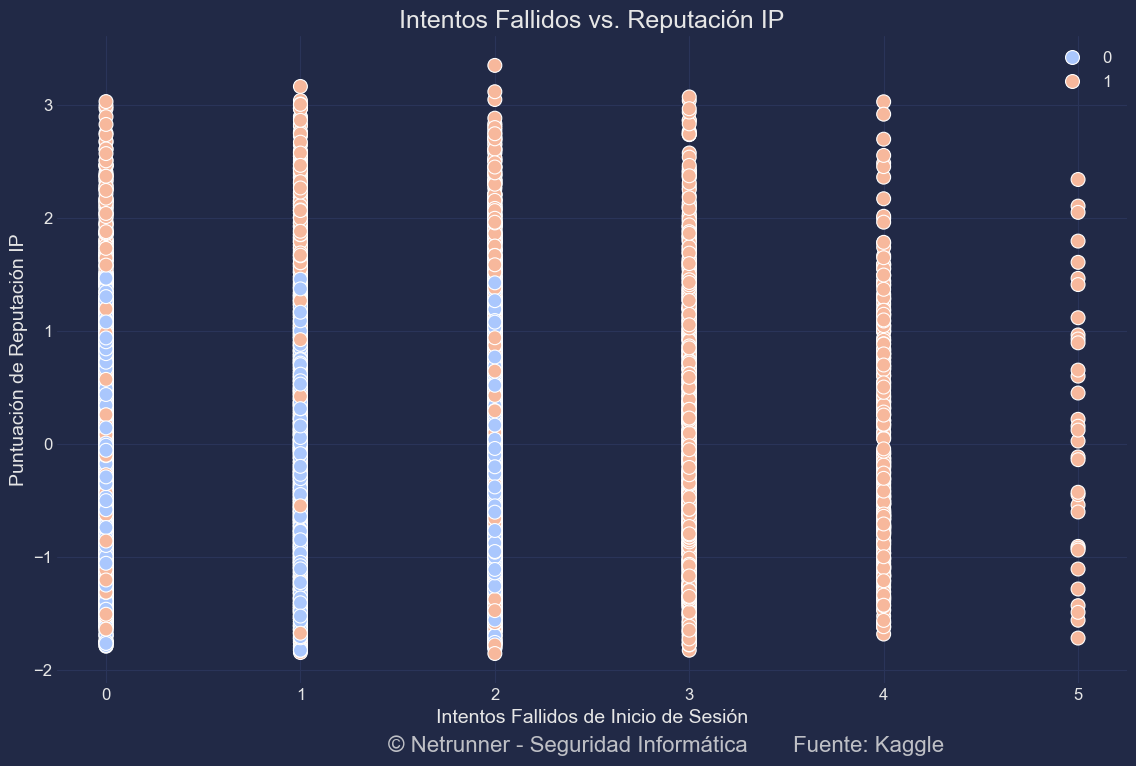

In [44]:
# 4. Relación entre intentos fallidos y reputación IP
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['failed_logins'], y=df['ip_reputation_score'], hue=df['attack_detected'], 
               palette='coolwarm', s=100)
plt.title("Intentos Fallidos vs. Reputación IP", fontsize=18)
plt.xlabel("Intentos Fallidos de Inicio de Sesión", fontsize=14)
plt.ylabel("Puntuación de Reputación IP", fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(fontsize=12)
plt.tight_layout(pad=3)
agregar_copyright(plt.gcf())
plt.savefig("4_intentos_fallidos_vs_reputacion_ip.png", dpi=300, bbox_inches='tight')
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_13496\1963178067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='failed_logins', y='ip_reputation_score', data=df, palette='coolwarm')


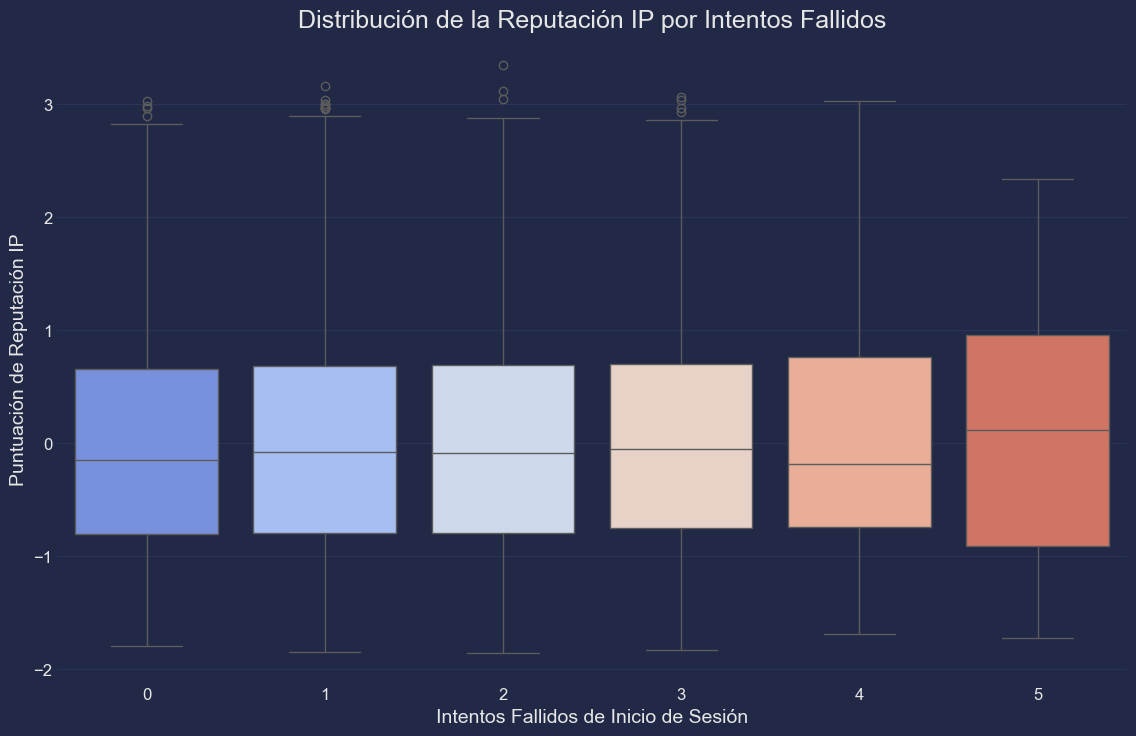

In [45]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='failed_logins', y='ip_reputation_score', data=df, palette='coolwarm')
plt.title("Distribución de la Reputación IP por Intentos Fallidos", fontsize=18)
plt.xlabel("Intentos Fallidos de Inicio de Sesión", fontsize=14)
plt.ylabel("Puntuación de Reputación IP", fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout(pad=3)
plt.show()


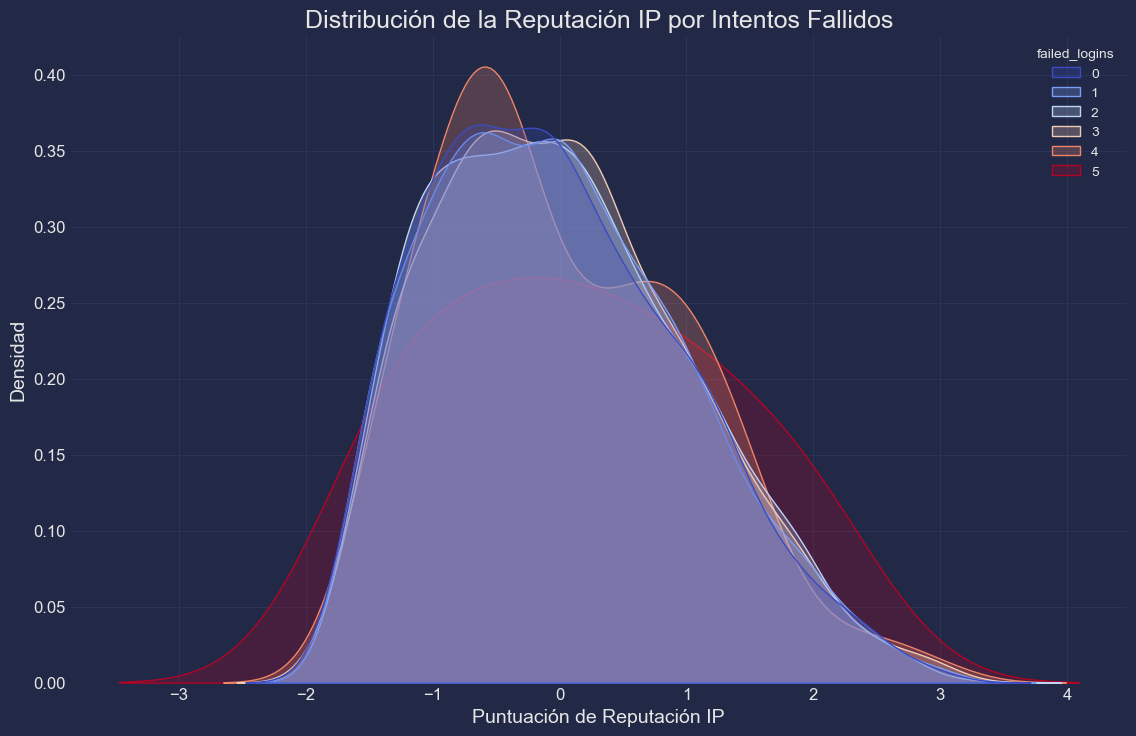

In [46]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='ip_reputation_score', hue='failed_logins', fill=True, common_norm=False, palette='coolwarm')
plt.title("Distribución de la Reputación IP por Intentos Fallidos", fontsize=18)
plt.xlabel("Puntuación de Reputación IP", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout(pad=3)
plt.show()


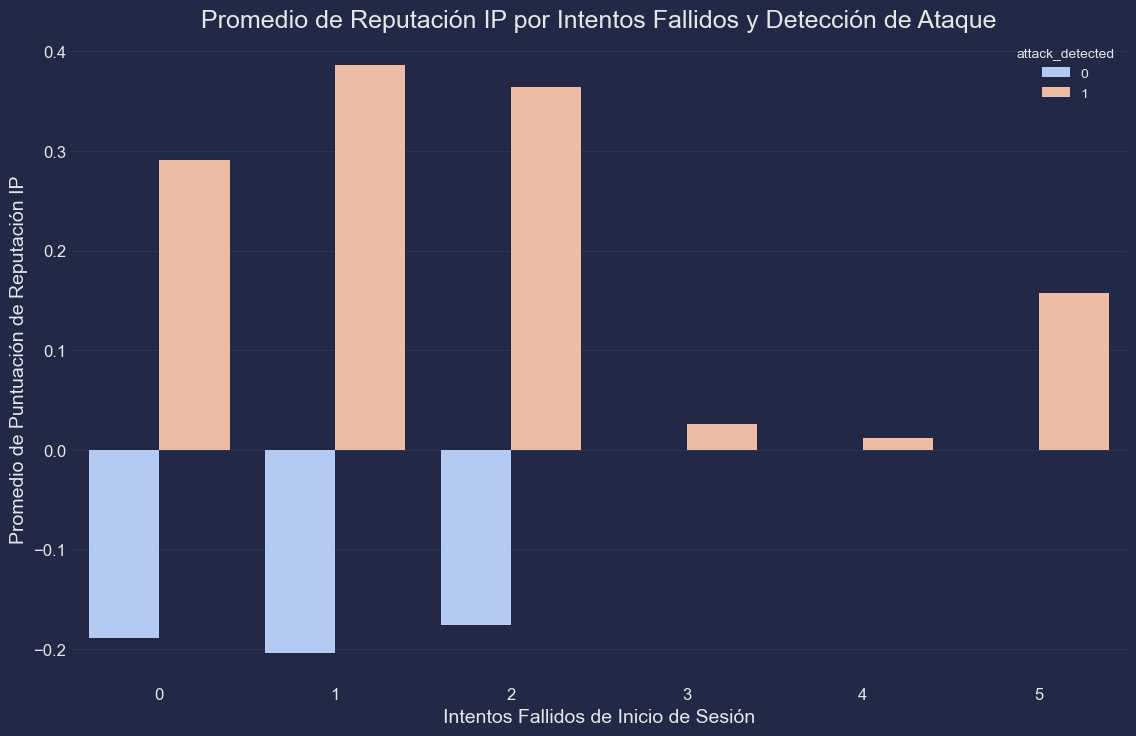

In [47]:
plt.figure(figsize=(12, 8))
df_grouped = df.groupby(['failed_logins', 'attack_detected']).agg({'ip_reputation_score': 'mean'}).reset_index()
sns.barplot(x='failed_logins', y='ip_reputation_score', hue='attack_detected', data=df_grouped, palette='coolwarm')
plt.title("Promedio de Reputación IP por Intentos Fallidos y Detección de Ataque", fontsize=18)
plt.xlabel("Intentos Fallidos de Inicio de Sesión", fontsize=14)
plt.ylabel("Promedio de Puntuación de Reputación IP", fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout(pad=3)
plt.show()


In [48]:
# Verifica los nombres de las columnas
print(df.columns)


Index(['session_id', 'network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected', 'failed_login_ratio', 'avg_packet_size'],
      dtype='object')


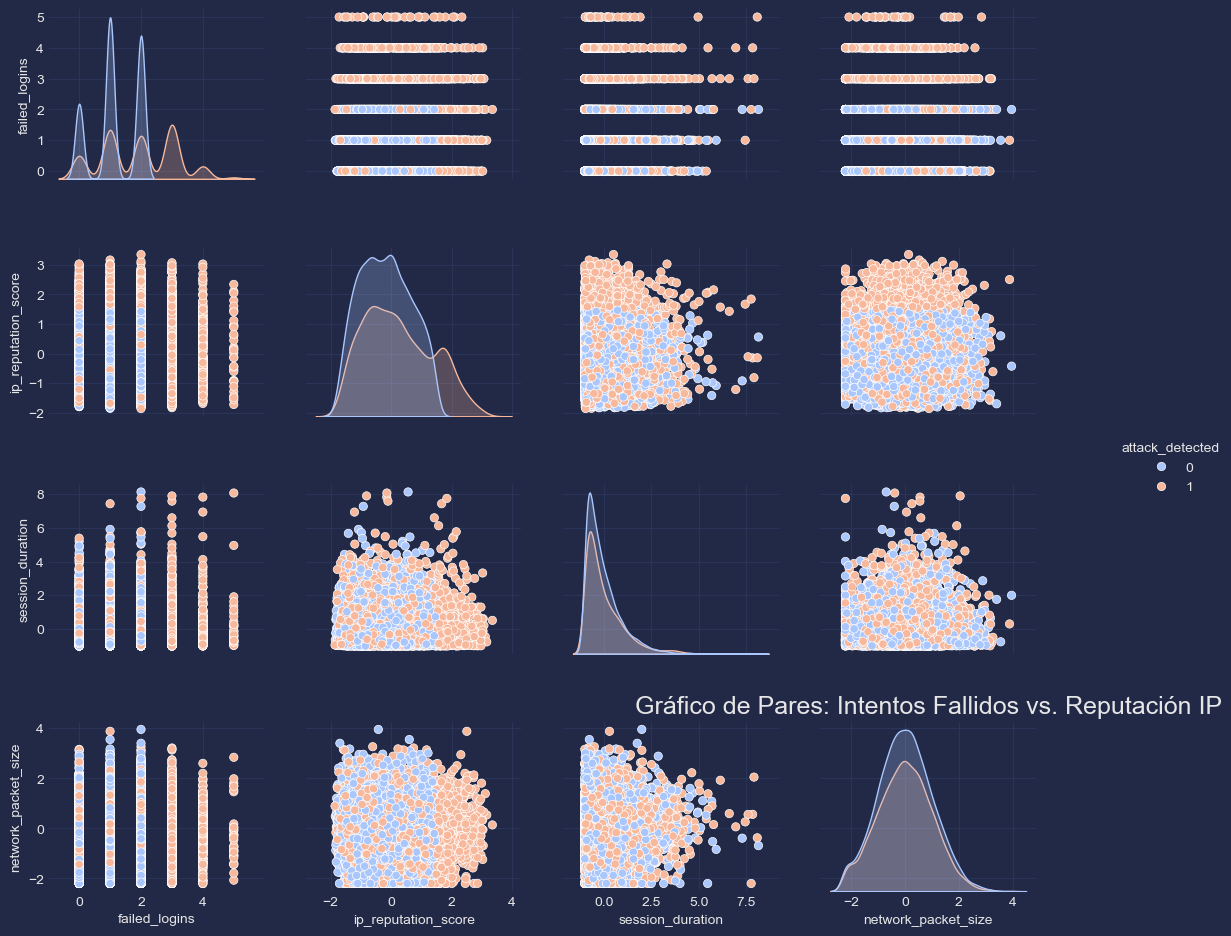

In [49]:
sns.pairplot(df[['failed_logins', 'ip_reputation_score', 'session_duration', 
                'network_packet_size', 'attack_detected']],  # Añade 'attack_detected' aquí
             hue='attack_detected', 
             palette='coolwarm')
plt.title("Gráfico de Pares: Intentos Fallidos vs. Reputación IP", fontsize=18)
plt.tight_layout(pad=3)
plt.show()


### 4. Intentos Fallidos vs. Reputación IP

El gráfico de dispersión revela una correlación entre:
- Número de inicios de sesión fallidos
- Puntuación de reputación IP (donde valores más altos indican mayor sospecha)
- Estado de detección de ataque (codificado por color)

Se observa claramente que:
- Las sesiones marcadas como ataques tienden a tener tanto mayor número de intentos fallidos como puntuaciones más altas de reputación IP
- Existe una concentración de puntos con alta reputación y múltiples intentos fallidos, casi todos clasificados como ataques

Este patrón refuerza la documentación que indica que las IPs con historial de actividades maliciosas (alta puntuación de reputación) suelen estar asociadas con intentos persistentes de acceso no autorizado.



C:\Users\User\AppData\Local\Temp\ipykernel_13496\3986589324.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(pad=3)
C:\Users\User\AppData\Local\Temp\ipykernel_13496\3986589324.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig("5_matriz_correlacion.png", dpi=300, bbox_inches='tight')
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


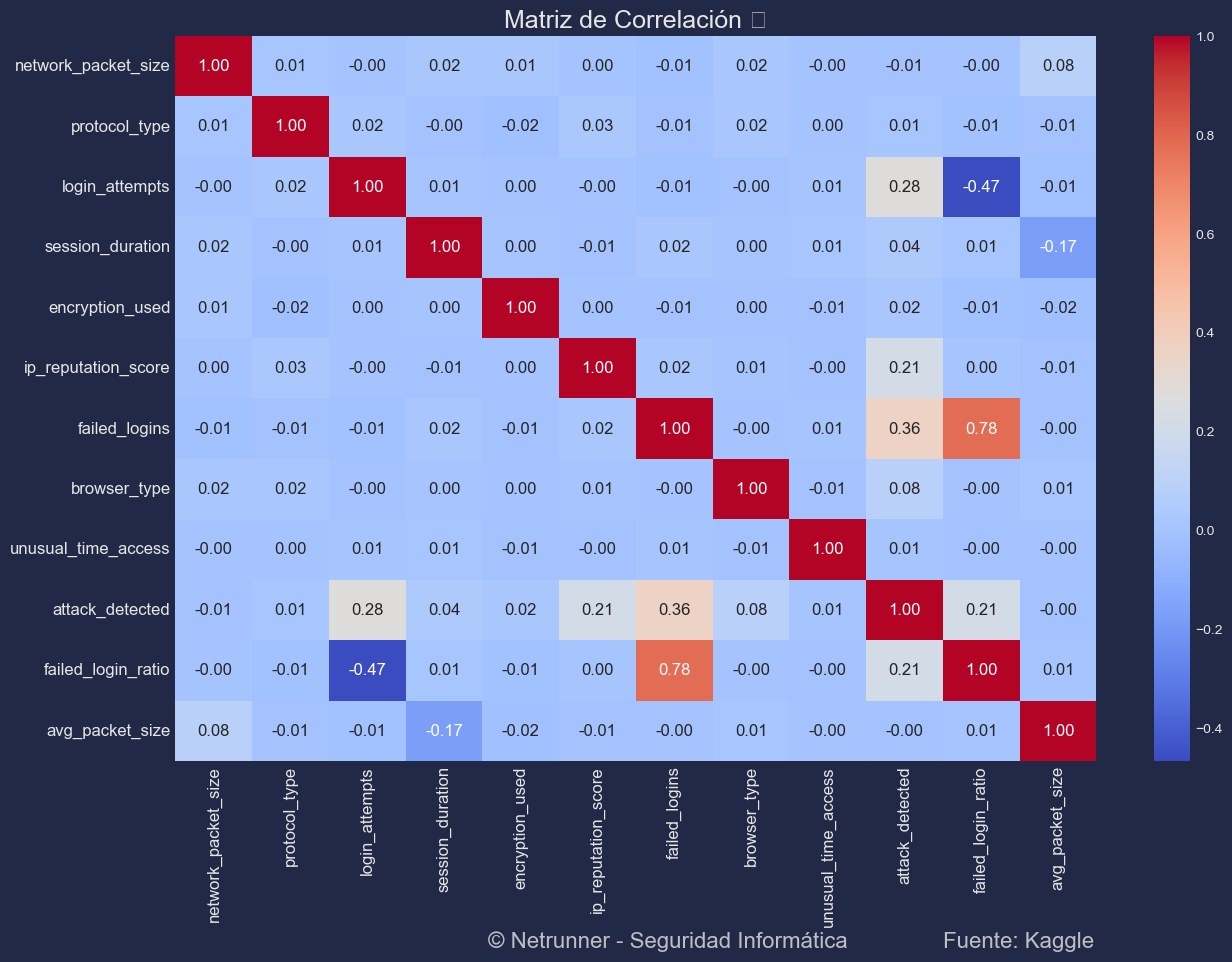

In [50]:
# 5. Matriz de correlación con variables numéricas
plt.figure(figsize=(14, 10))
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title("Matriz de Correlación 📊", fontsize=18)
plt.tick_params(labelsize=12)
plt.tight_layout(pad=3)
agregar_copyright(plt.gcf())
plt.savefig("5_matriz_correlacion.png", dpi=300, bbox_inches='tight')
plt.show()



### 5. Matriz de Correlación

La matriz de correlación revela relaciones significativas entre variables:

- Correlación de 0.28 entre `failed_logins` y `attack_detected`, confirmando que los intentos fallidos son indicadores relevantes de actividades maliciosas
- Hay una correlación moderada entre `failed_logins` y `attack_detected` (0.36), lo que sugiere que los intentos de inicio de sesión fallidos pueden ser un indicador de ataques.

Estas correlaciones proporcionan base cuantitativa para el diseño de sistemas de detección.



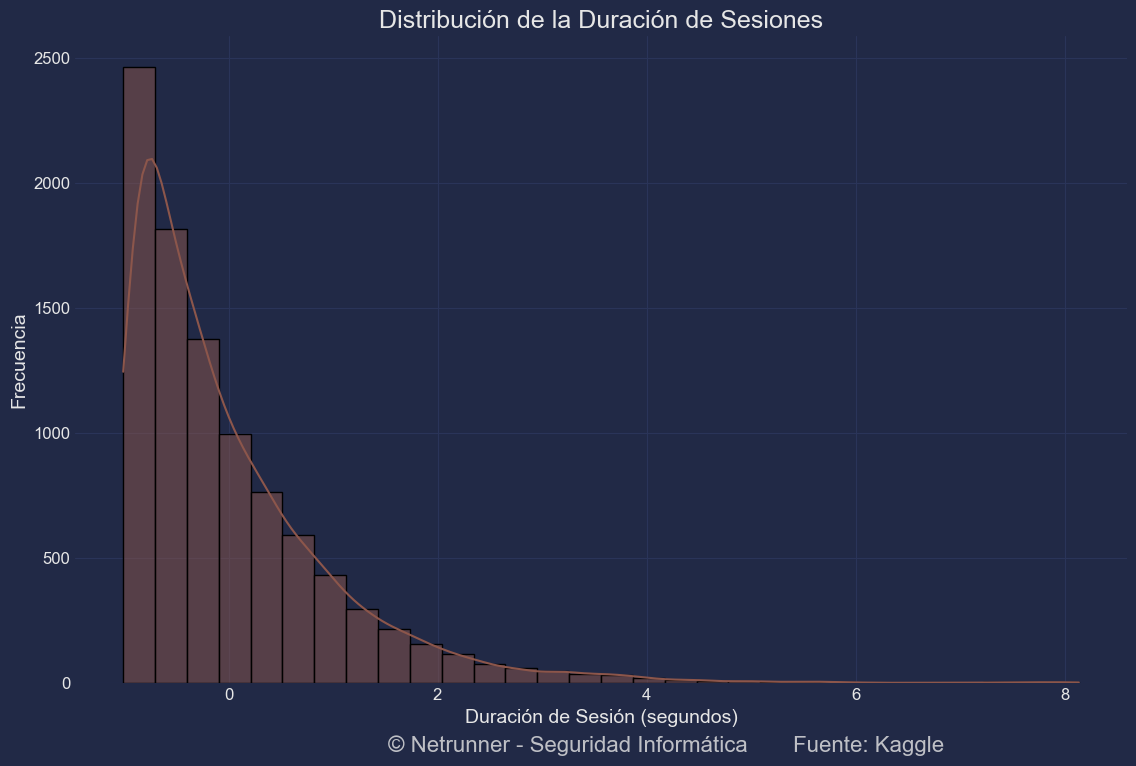

In [51]:
# 6. Distribución de la duración de sesiones
plt.figure(figsize=(12, 8))
sns.histplot(df['session_duration'], bins=30, kde=True, color='#8c564b')
plt.title("Distribución de la Duración de Sesiones", fontsize=18)
plt.xlabel("Duración de Sesión (segundos)", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout(pad=3)
agregar_copyright(plt.gcf())
plt.savefig("6_distribucion_duracion_sesiones.png", dpi=300, bbox_inches='tight')
plt.show()



In [52]:
df['session_duration'].head(25)

0    -0.381125
1     0.972960
2    -0.912503
3    -0.243473
4    -0.330830
5    -0.524175
6    -0.082183
7    -0.991897
8    -0.318093
9    -0.331589
10   -0.269572
11   -0.765007
12   -0.771244
13    0.051803
14   -0.908936
15   -0.636487
16    0.799306
17   -0.896487
18   -0.365861
19    0.115537
20   -0.852562
21   -0.626856
22   -0.175735
23   -0.604774
24   -0.889456
Name: session_duration, dtype: float64

### 6. Distribución de la Duración de Sesiones

El histograma muestra:
- La mayoría de las sesiones duran entre 0 y 2 segundos (Los datos están escalados, ver histograma sin escalar, es el mismo)
- Existe una clara disminución en frecuencia a medida que aumenta la duración
- Sesiones muy cortas predominan, lo que podría indicar tanto conexiones legítimas rápidas como intentos breves de reconocimiento

La documentación menciona que sesiones inusualmente largas podrían indicar acceso no autorizado o intentos de mantener persistencia, sin embargo, el análisis muestra una predominancia de sesiones cortas en el conjunto de datos.

El escalado cambia la interpretación de los valores absolutos, pero no afecta la relación y las tendencias dentro de la distribución de los datos.


# PARA DATOS NO ESCALADOS:

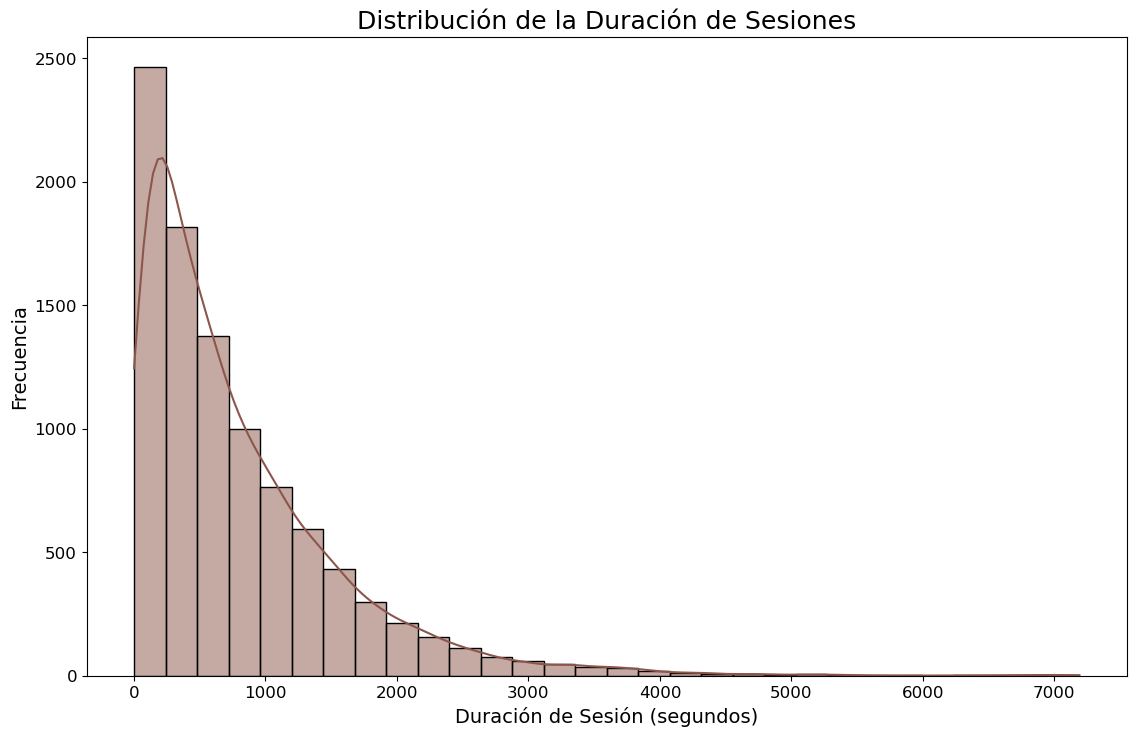


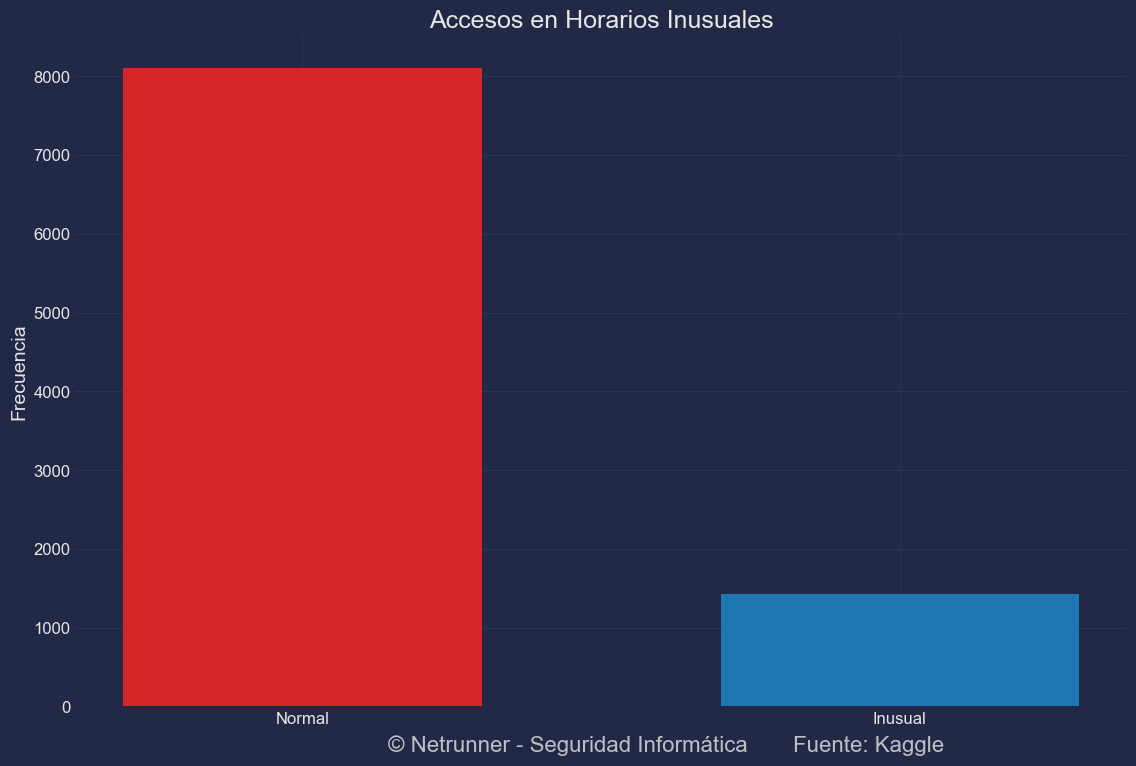

In [53]:
# 7. Análisis de accesos en horarios inusuales
plt.figure(figsize=(12, 8))
time_counts = df['unusual_time_access'].value_counts()
plt.bar(time_counts.index, time_counts.values, color=['#d62728', '#1f77b4'], width=0.6)
plt.title("Accesos en Horarios Inusuales", fontsize=18)
plt.xticks([0, 1], ["Normal", "Inusual"], fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout(pad=3)
agregar_copyright(plt.gcf())
plt.savefig("7_accesos_horarios_inusuales.png", dpi=300, bbox_inches='tight')
plt.show()



### 7. Accesos en Horarios Inusuales

El gráfico de barras indica:
- Aproximadamente 8,000 sesiones ocurren en horarios normales
- Alrededor de 1,500 sesiones ocurren en horarios considerados inusuales

Esta proporción significativa de accesos en horarios atípicos (aproximadamente 16% del total) merece atención, ya que, según la documentación, los atacantes suelen operar fuera de horarios laborales habituales para evadir detección.



C:\Users\User\AppData\Local\Temp\ipykernel_13496\373808893.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=browser_counts.index, y=browser_counts.values, palette="viridis")


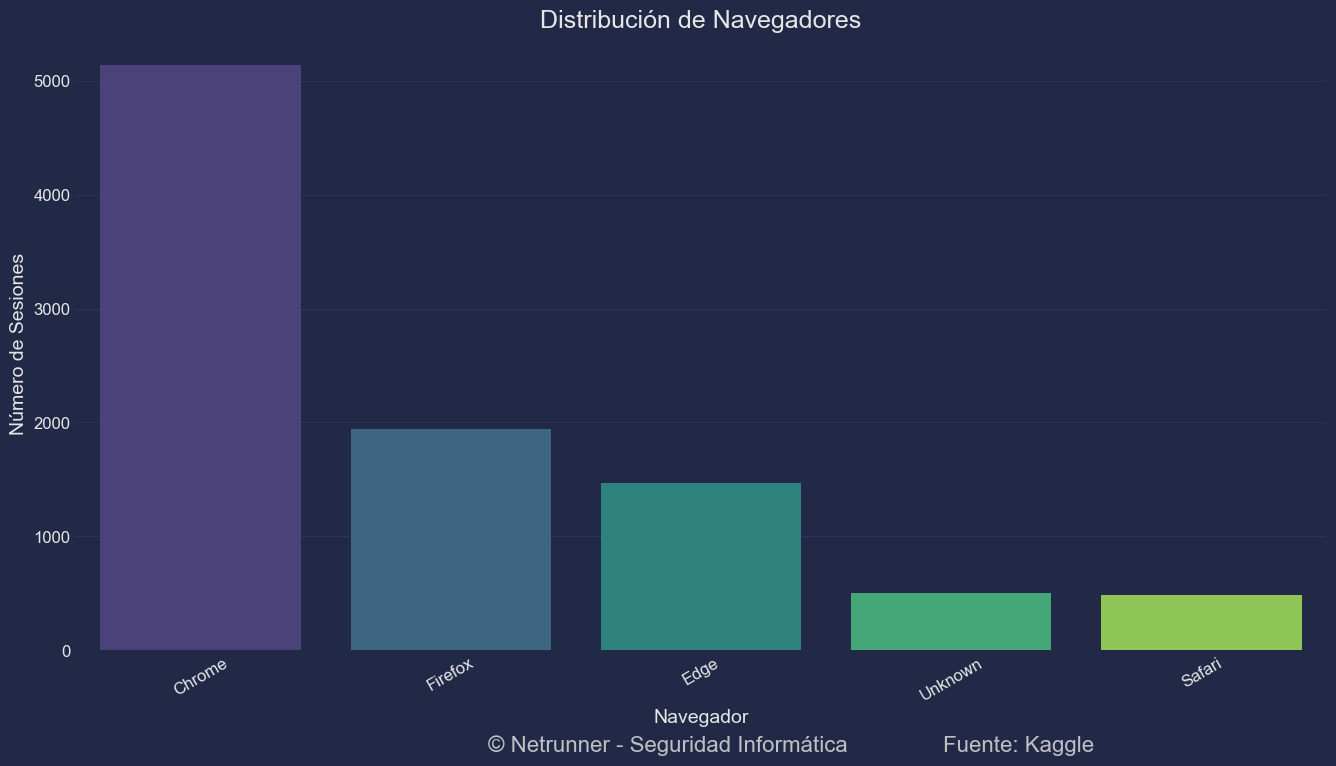

In [54]:
# 8. Navegadores utilizados por los usuarios

# Mapeo de los valores codificados a los nombres de los navegadores
browser_mapping = {0: 'Chrome', 1: 'Edge', 2: 'Firefox', 3: 'Safari', 4: 'Unknown'}

# Aplicamos el mapeo al DataFrame
df['browser_name'] = df['browser_type'].map(browser_mapping)

plt.figure(figsize=(14, 8))
browser_counts = df['browser_name'].value_counts()
sns.barplot(x=browser_counts.index, y=browser_counts.values, palette="viridis")
plt.title("Distribución de Navegadores", fontsize=18)
plt.xlabel("Navegador", fontsize=14)
plt.ylabel("Número de Sesiones", fontsize=14)
plt.tick_params(axis='x', rotation=30, labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.tight_layout(pad=3)
agregar_copyright(plt.gcf())
plt.savefig("8_distribucion_navegadores.png", dpi=300, bbox_inches='tight')
plt.show()



### 8. Distribución de Navegadores
El gráfico muestra:

* Chrome (tipo 0) como el navegador más frecuente, con aproximadamente 5,000 sesiones.

* Firefox (tipo 2) y Edge (tipo 1) con alrededor de 1,500 y 2,000 sesiones, respectivamente.

* Safari (tipo 3) y Unknown (tipo 4) con frecuencias menores.

La presencia de navegadores "Unknown" merece atención especial, ya que, según la documentación, estos podrían indicar scripts automatizados o bots, frecuentemente asociados con ataques o comportamientos anómalos.


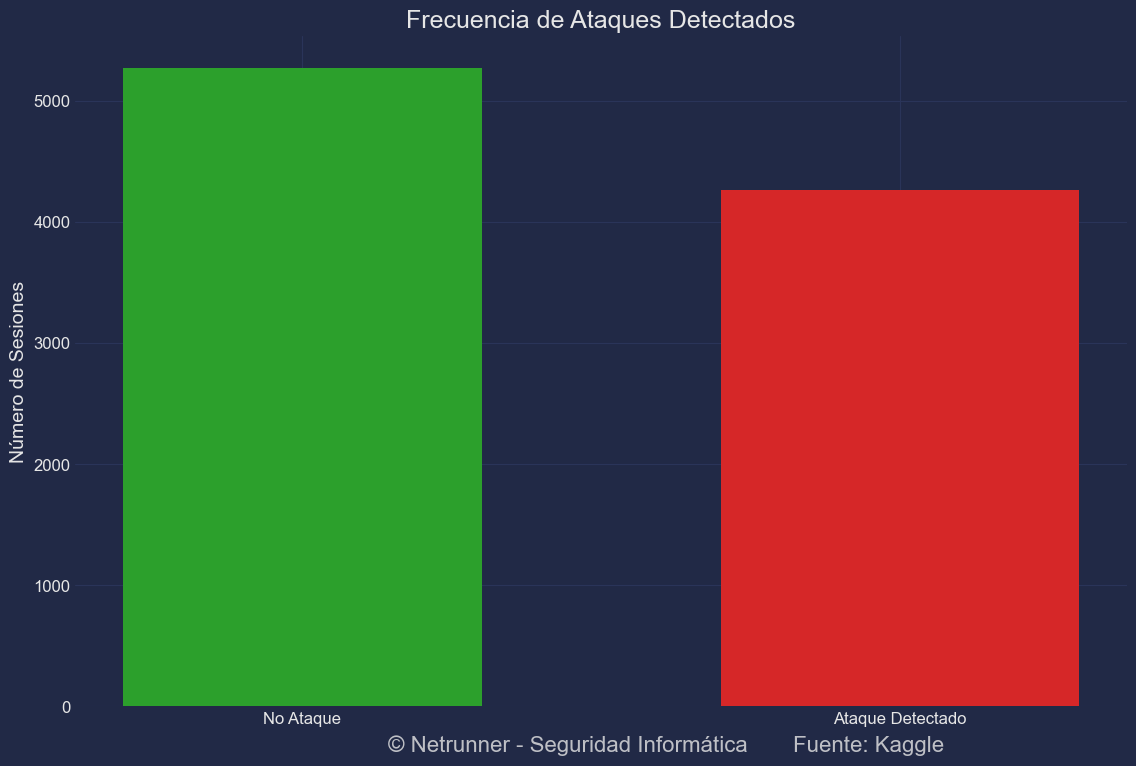

In [55]:
# 9. Comparación de ataques detectados
plt.figure(figsize=(12, 8))
attack_counts = df['attack_detected'].value_counts()
plt.bar(attack_counts.index, attack_counts.values, color=['#2ca02c', '#d62728'], width=0.6)
plt.title("Frecuencia de Ataques Detectados", fontsize=18)
plt.xticks([0, 1], ["No Ataque", "Ataque Detectado"], fontsize=14)
plt.ylabel("Número de Sesiones", fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout(pad=3)
agregar_copyright(plt.gcf())
plt.savefig("9_frecuencia_ataques.png", dpi=300, bbox_inches='tight')
plt.show()

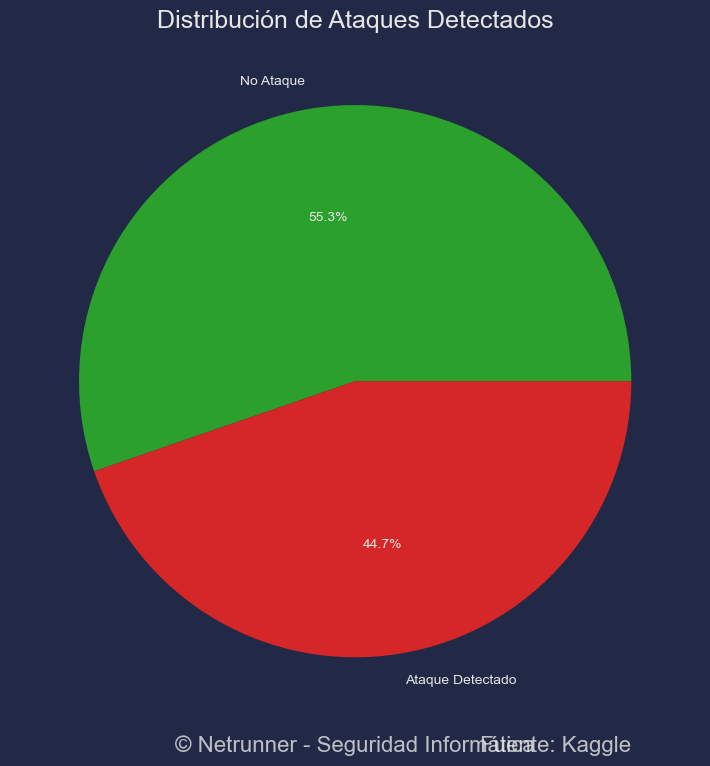

In [56]:
plt.figure(figsize=(8, 8))
attack_counts = df['attack_detected'].value_counts()
plt.pie(attack_counts.values, labels=["No Ataque", "Ataque Detectado"], autopct='%1.1f%%', colors=['#2ca02c', '#d62728'])
plt.title("Distribución de Ataques Detectados", fontsize=18)
plt.tight_layout(pad=3)
agregar_copyright(plt.gcf())
plt.savefig("9_distribucion_ataques_pie.png", dpi=300, bbox_inches='tight')
plt.show()


### 9. Frecuencia de Ataques Detectados

El gráfico revela:
- Aproximadamente 5,000 sesiones clasificadas como normales (No Ataque)
- Aproximadamente 4,200 sesiones clasificadas como ataques

Esta distribución muestra una alarmante proporción de tráfico malicioso (aproximadamente 44.4% del total), indicando un entorno con alta actividad adversarial.

# Dashboard

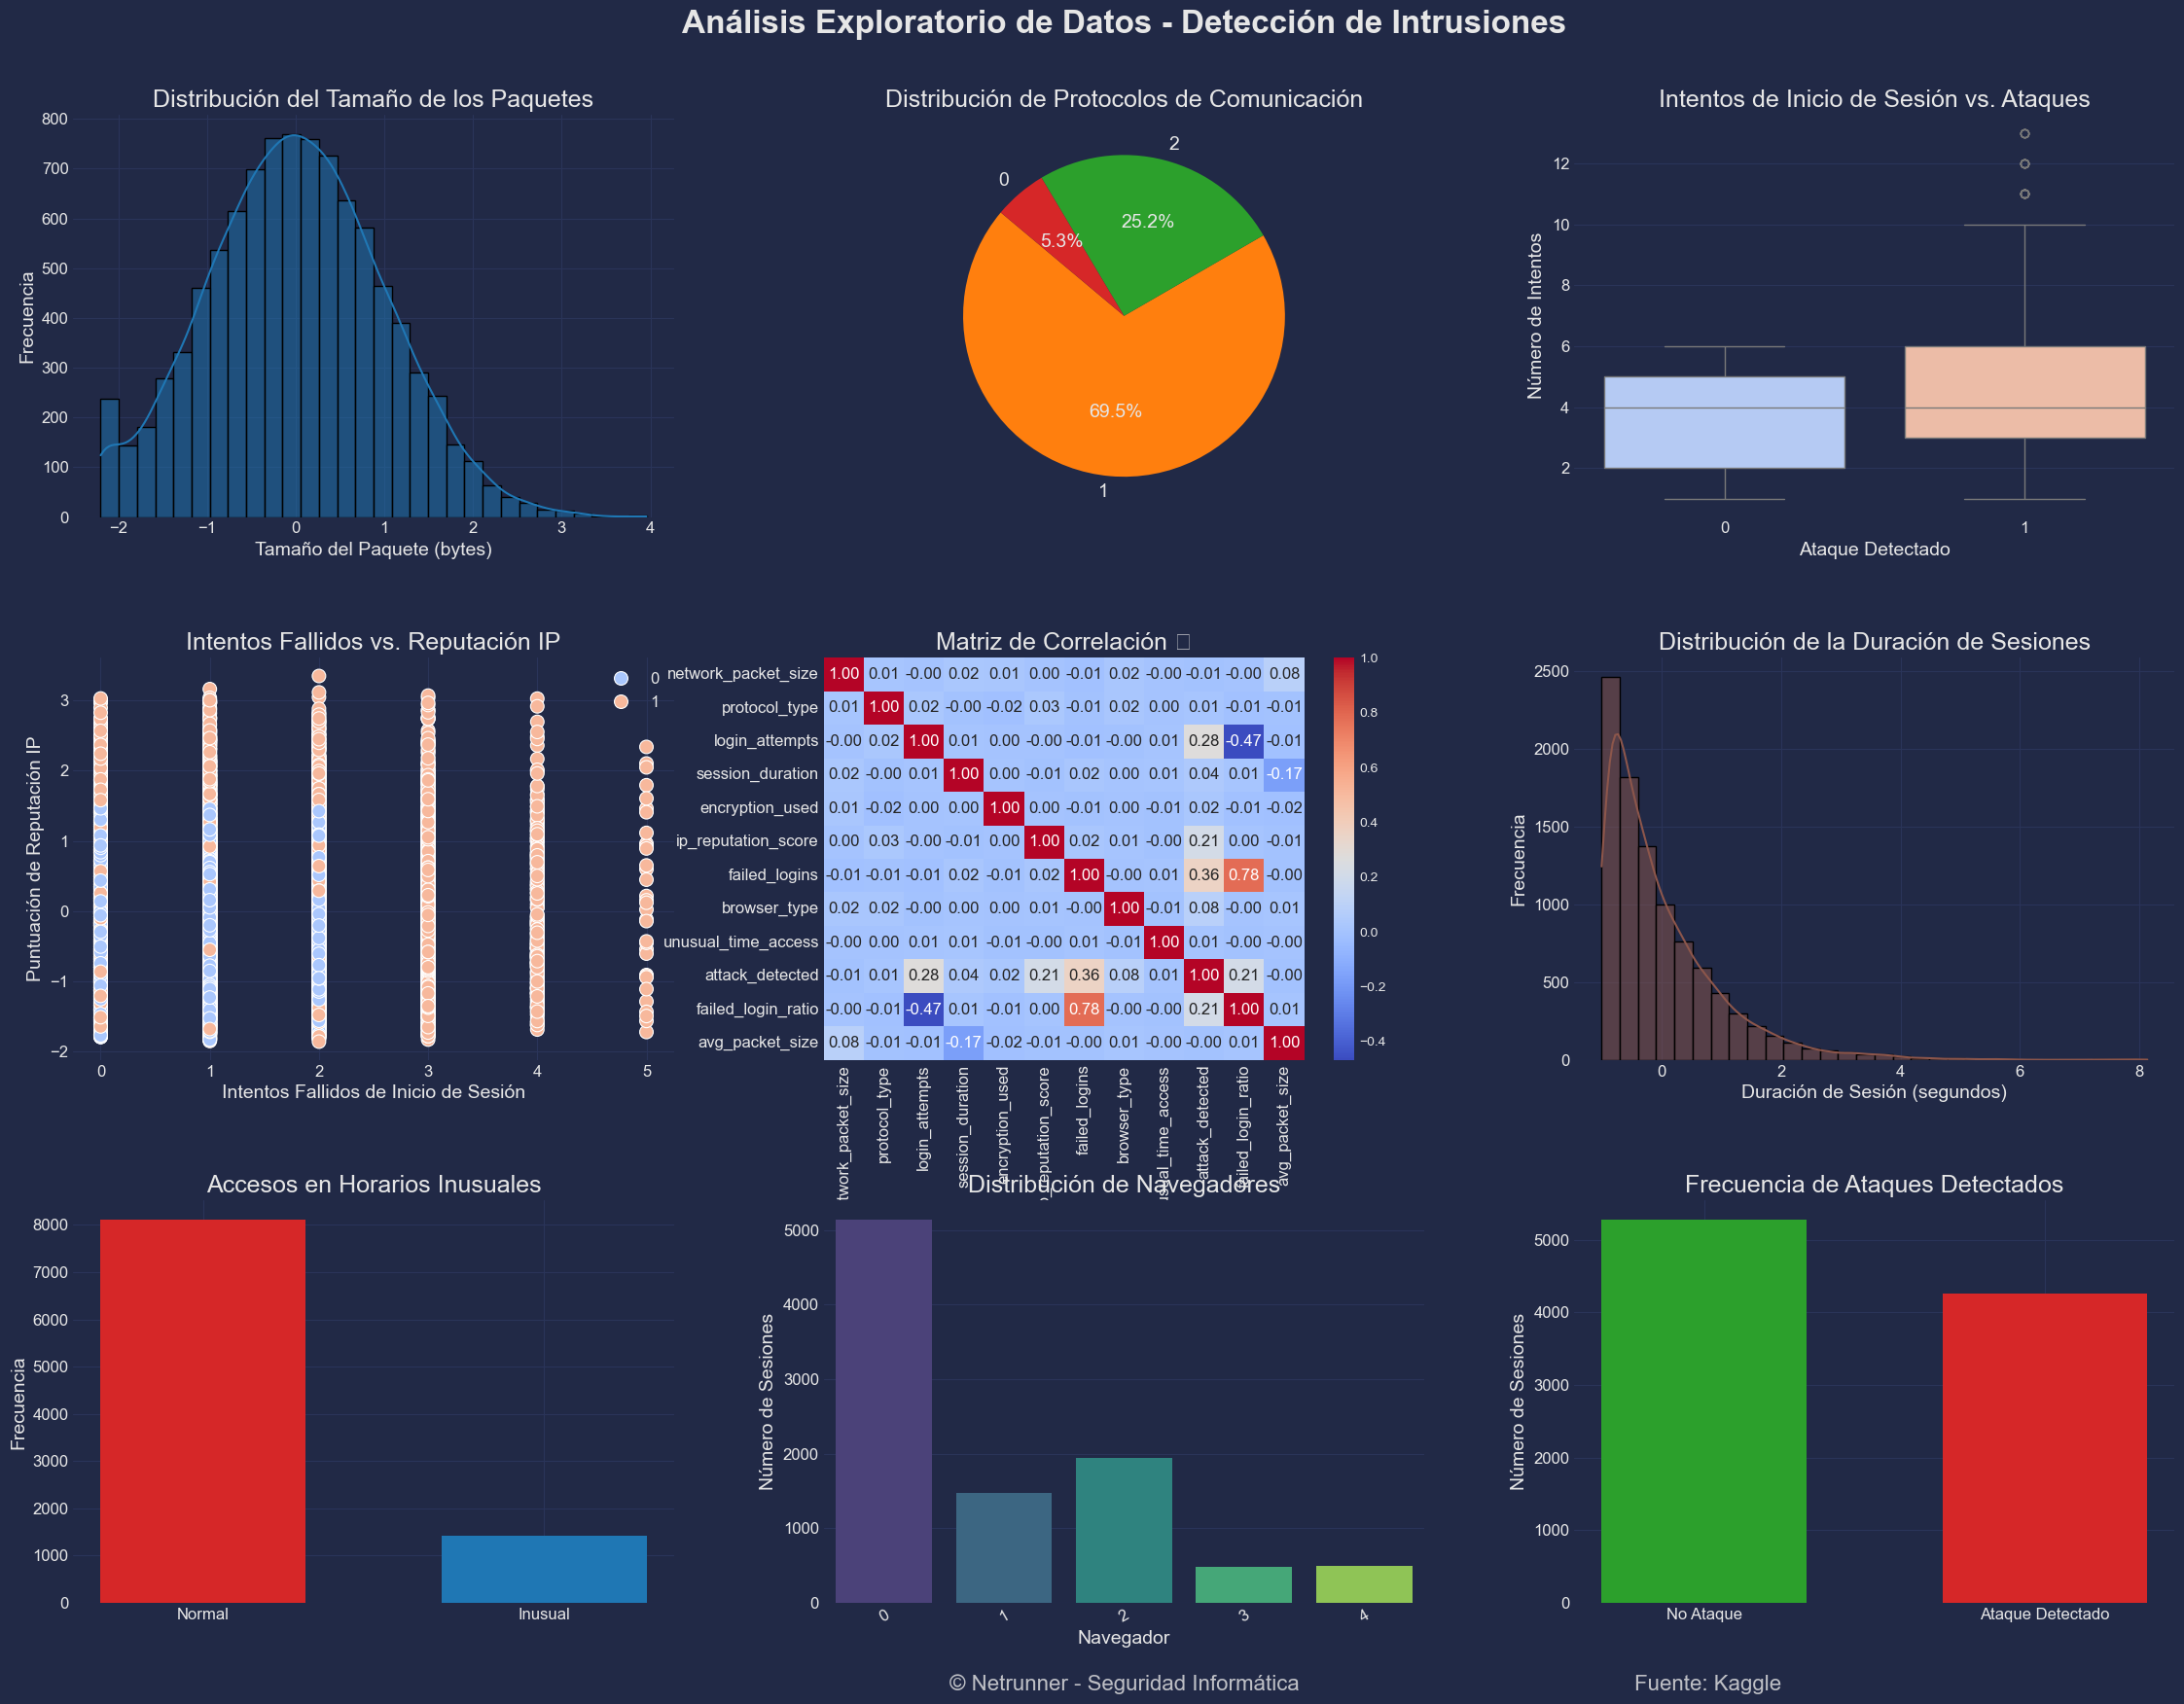

In [57]:
import warnings
warnings.filterwarnings('ignore')
# Estilo profesional
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")

# Configuración de fuente Arial
plt.rcParams['font.family'] = 'Arial'

# Crear figura y ejes en un grid 3x3 con mayor tamaño y espaciado
fig, axes = plt.subplots(3, 3, figsize=(24, 18))
fig.suptitle("Análisis Exploratorio de Datos - Detección de Intrusiones", fontsize=24, fontweight='bold', y=0.98)

# 1. Distribución del tamaño de los paquetes
sns.histplot(df['network_packet_size'], bins=30, kde=True, color='#1f77b4', ax=axes[0, 0])
axes[0, 0].set_title("Distribución del Tamaño de los Paquetes", fontsize=18)
axes[0, 0].set_xlabel("Tamaño del Paquete (bytes)", fontsize=14)
axes[0, 0].set_ylabel("Frecuencia", fontsize=14)
axes[0, 0].tick_params(labelsize=12)

# 2. Proporción de protocolos de comunicación
protocol_counts = df['protocol_type'].value_counts()
axes[0, 1].pie(protocol_counts, labels=protocol_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff7f0e', '#2ca02c', '#d62728'], textprops={'fontsize': 14})
axes[0, 1].set_title("Distribución de Protocolos de Comunicación", fontsize=18)

# 3. Intentos de inicio de sesión vs. ataques detectados
sns.boxplot(x=df['attack_detected'], y=df['login_attempts'], palette='coolwarm', ax=axes[0, 2])
axes[0, 2].set_title("Intentos de Inicio de Sesión vs. Ataques", fontsize=18)
axes[0, 2].set_xlabel("Ataque Detectado", fontsize=14)
axes[0, 2].set_ylabel("Número de Intentos", fontsize=14)
axes[0, 2].tick_params(labelsize=12)

# 4. Relación entre intentos fallidos y reputación IP
sns.scatterplot(x=df['failed_logins'], y=df['ip_reputation_score'], hue=df['attack_detected'], palette='coolwarm', ax=axes[1, 0], s=100)
axes[1, 0].set_title("Intentos Fallidos vs. Reputación IP", fontsize=18)
axes[1, 0].set_xlabel("Intentos Fallidos de Inicio de Sesión", fontsize=14)
axes[1, 0].set_ylabel("Puntuación de Reputación IP", fontsize=14)
axes[1, 0].tick_params(labelsize=12)
axes[1, 0].legend(fontsize=12)

# 5. Matriz de correlación con variables numéricas
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 1], annot_kws={"size": 12})
axes[1, 1].set_title("Matriz de Correlación 📊", fontsize=18)
axes[1, 1].tick_params(labelsize=12)

# 6. Distribución de la duración de sesiones
sns.histplot(df['session_duration'], bins=30, kde=True, color='#8c564b', ax=axes[1, 2])
axes[1, 2].set_title("Distribución de la Duración de Sesiones", fontsize=18)
axes[1, 2].set_xlabel("Duración de Sesión (segundos)", fontsize=14)
axes[1, 2].set_ylabel("Frecuencia", fontsize=14)
axes[1, 2].tick_params(labelsize=12)

# 7. Análisis de accesos en horarios inusuales
time_counts = df['unusual_time_access'].value_counts()
axes[2, 0].bar(time_counts.index, time_counts.values, color=['#d62728', '#1f77b4'], width=0.6)
axes[2, 0].set_title("Accesos en Horarios Inusuales", fontsize=18)
axes[2, 0].set_xticks([0, 1])
axes[2, 0].set_xticklabels(["Normal", "Inusual"], fontsize=14)
axes[2, 0].set_ylabel("Frecuencia", fontsize=14)
axes[2, 0].tick_params(labelsize=12)

# 8. Navegadores utilizados por los usuarios
browser_counts = df['browser_type'].value_counts()
sns.barplot(x=browser_counts.index, y=browser_counts.values, palette="viridis", ax=axes[2, 1])
axes[2, 1].set_title("Distribución de Navegadores", fontsize=18)
axes[2, 1].set_xlabel("Navegador", fontsize=14)
axes[2, 1].set_ylabel("Número de Sesiones", fontsize=14)
axes[2, 1].tick_params(axis='x', rotation=30, labelsize=12)
axes[2, 1].tick_params(axis='y', labelsize=12)

# 9. Comparación de ataques detectados
attack_counts = df['attack_detected'].value_counts()
axes[2, 2].bar(attack_counts.index, attack_counts.values, color=['#2ca02c', '#d62728'], width=0.6)
axes[2, 2].set_title("Frecuencia de Ataques Detectados", fontsize=18)
axes[2, 2].set_xticks([0, 1])
axes[2, 2].set_xticklabels(["No Ataque", "Ataque Detectado"], fontsize=14)
axes[2, 2].set_ylabel("Número de Sesiones", fontsize=14)
axes[2, 2].tick_params(labelsize=12)

# Aumentar el espacio entre subplots
plt.subplots_adjust(left=0.05, bottom=0.07, right=0.95, top=0.92, wspace=0.25, hspace=0.35)

# Añadir marca de agua/pie de página con mayor tamaño y visibilidad
fig.text(0.5, 0.02, "© Netrunner - Seguridad Informática", ha='center', fontsize=16, alpha=0.8)
fig.text(0.75, 0.02, "Fuente: Kaggle", ha='center', fontsize=16, alpha=0.8)

# Mostrar el dashboard
plt.show()

## Conclusiones y Aplicaciones

El análisis de este conjunto de datos revela patrones significativos que pueden informar sistemas de detección de intrusiones:

1. **Patrones de autenticación anómalos**: La fuerte relación entre intentos fallidos e intentos múltiples de inicio de sesión con ataques detectados sugiere que los sistemas de detección deberían monitorear de cerca estos comportamientos.

2. **Importancia del contexto temporal**: Los accesos en horarios inusuales representan un indicador relevante de posibles intrusiones, apoyando la implementación de detección contextual basada en tiempo.

3. **Valor predictivo de la reputación IP**: La correlación entre puntuaciones de reputación y ataques confirma la utilidad de incorporar inteligencia de amenazas externa en los sistemas de detección.

5. **Alta prevalencia de ataques**: Con un 44.4% de sesiones clasificadas como ataques, los datos reflejan un entorno altamente atacado, justificando inversión en sistemas robustos de ciberseguridad.

Estos hallazgos pueden informar el desarrollo de sistemas de detección de intrusiones basados en:

- **Aprendizaje supervisado**: Utilizando las características identificadas como relevantes (intentos fallidos, reputación IP, accesos en horarios inusuales) para entrenar modelos predictivos.
  
- **Detección de anomalías**: Implementando sistemas que identifiquen desviaciones respecto a patrones normales de tamaño de paquete, duración de sesión o comportamiento de autenticación.
  
- **Sistemas basados en reglas**: Estableciendo umbrales específicos para variables críticas como número de intentos fallidos o puntuación de reputación IP.

La combinación de estos enfoques, informados por el análisis presentado, puede proporcionar una defensa más efectiva contra intrusiones en entornos de red.

---

© Netrunner - Seguridad Informática
Fuente: Kaggle

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   float64
 2   protocol_type        9537 non-null   int32  
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      9537 non-null   int32  
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   int32  
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
 11  failed_login_ratio   9537 non-null   float64
 12  avg_packet_size      9537 non-null   float64
 13  browser_name         9537 non-null   object 
dtypes: float64(5), int32(3), int64(4), object(2)
memory usage: 931.5+ KB


El test de Kolmogorov-Smirnov (KS) y el gráfico Q-Q se utilizan para evaluar la normalidad de los datos y son parte de la exploración previa a los test de hipótesis paramétricos.

Entonces, el orden correcto sería:

1. Evaluar la normalidad de los datos:

* Aplicar el test de Kolmogorov-Smirnov (o Shapiro-Wilk si el tamaño de la muestra lo permite).

* Visualizar con gráficos Q-Q para confirmar la distribución.

2. Elegir el test de hipótesis adecuado:

* Si los datos son normales → usar tests paramétricos (t-test, ANOVA).

* Si no son normales → usar tests no paramétricos (Mann-Whitney U, Kruskal-Wallis).

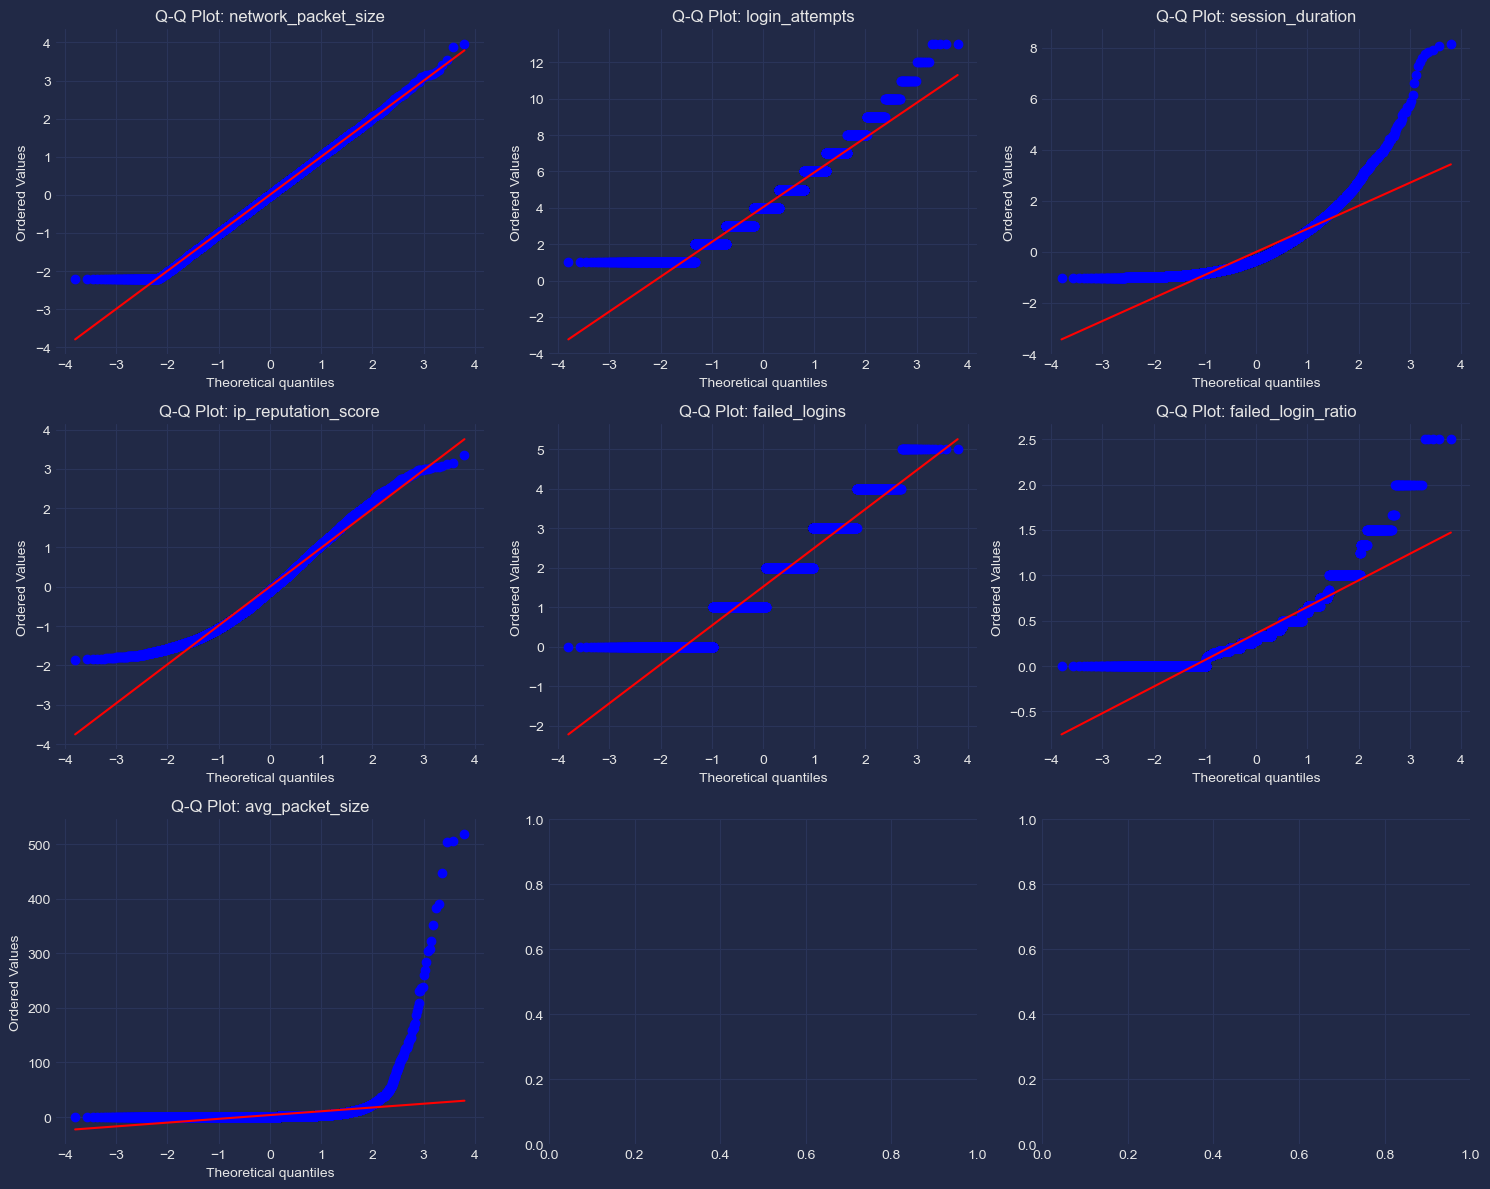

{'network_packet_size': KstestResult(statistic=0.01390415589664033, pvalue=0.04960309711574473, statistic_location=-2.2000953799704495, statistic_sign=-1),
 'login_attempts': KstestResult(statistic=0.12775790334742843, pvalue=3.6688274592443254e-136, statistic_location=3, statistic_sign=1),
 'session_duration': KstestResult(statistic=0.15691263757017787, pvalue=1.4813024239488198e-205, statistic_location=-1.0072806966973127, statistic_sign=-1),
 'ip_reputation_score': KstestResult(statistic=0.050773284069601965, pvalue=8.312120701228671e-22, statistic_location=-0.5248275978888811, statistic_sign=1),
 'failed_logins': KstestResult(statistic=0.21191213837826556, pvalue=0.0, statistic_location=1, statistic_sign=1),
 'failed_login_ratio': KstestResult(statistic=0.14515216472268555, pvalue=8.03784415477086e-176, statistic_location=0.3333333333333333, statistic_sign=1),
 'avg_packet_size': KstestResult(statistic=0.419804535804627, pvalue=0.0, statistic_location=0.00928888144191407, statistic

In [59]:
import scipy.stats as stats
# Seleccionamos las variables numéricas para evaluar normalidad
numerical_cols = ["network_packet_size", "login_attempts", "session_duration", 
                  "ip_reputation_score", "failed_logins", "failed_login_ratio", "avg_packet_size"]

# Aplicamos Kolmogorov-Smirnov para cada variable
ks_results = {col: stats.kstest(df[col], 'norm', args=(df[col].mean(), df[col].std())) for col in numerical_cols}

# Graficamos Q-Q plots para las variables numéricas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    stats.probplot(df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot: {col}')

plt.tight_layout()
plt.show()

# Mostramos los resultados de KS test
ks_results

Dado que el **QQ plot** y el test de **Kolmogorov-Smirnov** indican que la mayoría de las variables **no siguen una distribución normal**, el siguiente paso es:  

1. **Decidir qué test de hipótesis usar**  
   - Si queremos comparar medias entre dos grupos (ej. sesiones con vs. sin ataque):  
     - **Si las variables fueran normales** → usaríamos **t-test** (prueba de Student).  
     - **Como no son normales** → usamos **Mann-Whitney U** (test de suma de rangos).  

   - Si queremos ver si hay asociaciones entre variables categóricas (ej. "ataque detectado" vs. "tipo de navegador"):  
     - **Usamos Chi-cuadrado de independencia**.  

2. **Transformar variables (opcional)**  
   - Si queremos probar si alguna variable se vuelve más normal con una transformación:  
     - Logaritmo (si hay valores positivos).  
     - Raíz cuadrada o Box-Cox.  
     - Esto puede permitirnos aplicar tests paramétricos.  

3. **Definir hipótesis concretas**  
   - Ejemplos de hipótesis a probar:  
     1. **Las sesiones con ataque tienen más intentos de inicio de sesión en promedio**.  
     2. **La reputación IP es menor en sesiones con ataques**.  
     3. **El tamaño medio de paquetes difiere entre sesiones con y sin ataques**.  

**Recomendación**: Pasemos directo a los **tests no paramétricos** para no perder tiempo con transformaciones. Arranquemos con **Mann-Whitney U** y Chi-cuadrado.  


In [60]:
# Filtramos por la variable "attack_detected"
grupo_sin_ataque = df[df["attack_detected"] == 0]
grupo_con_ataque = df[df["attack_detected"] == 1]

# Aplicamos Mann-Whitney U test para las tres hipótesis
tests_mann_whitney = {
    "login_attempts": stats.mannwhitneyu(
        grupo_sin_ataque["login_attempts"], grupo_con_ataque["login_attempts"], alternative="two-sided"
    ),
    "ip_reputation_score": stats.mannwhitneyu(
        grupo_sin_ataque["ip_reputation_score"], grupo_con_ataque["ip_reputation_score"], alternative="two-sided"
    ),
    "avg_packet_size": stats.mannwhitneyu(
        grupo_sin_ataque["avg_packet_size"], grupo_con_ataque["avg_packet_size"], alternative="two-sided"
    ),
}

# Mostramos los resultados
for variable, resultado in tests_mann_whitney.items():
    print(f"{variable}: U={resultado.statistic}, p-valor={resultado.pvalue}")

login_attempts: U=8233614.5, p-valor=6.93169824213043e-115
ip_reputation_score: U=9006791.0, p-valor=9.292091622736278e-63
avg_packet_size: U=11460979.0, p-valor=0.10146839017499189


#### Interpretación de los resultados:
##### Login Attempts 6.93169824213043e-115

* Conclusión: Como el p-valor es extremadamente bajo, rechazamos la hipótesis nula.

* Interpretación: La cantidad de intentos de inicio de sesión es significativamente diferente entre sesiones con y sin ataques. Esto sugiere que los intentos de login pueden ser un buen predictor de ataques.

##### IP Reputation Score 9.292091622736278e-63

* Conclusión: Nuevamente, el p-valor es muy bajo, por lo que rechazamos la hipótesis nula.

* Interpretación: Las IPs asociadas a ataques tienen puntuaciones de reputación significativamente diferentes a las de sesiones sin ataque. Este indicador también parece relevante para la detección de ataques.

##### Avg Packet Size (p = 0.101)

* Conclusión: El p-valor es mayor a 0.05, por lo que no podemos rechazar la hipótesis nula.

* Interpretación: No hay evidencia suficiente para afirmar que el tamaño promedio de los paquetes es diferente en sesiones con y sin ataques. Esto sugiere que esta variable podría no ser útil para la detección de ataques.

### Siguiente paso: Chi-Cuadrado
Ahora que ya probamos hipótesis con Mann-Whitney U en variables continuas, pasemos a Chi-Cuadrado, que nos permitirá analizar si variables categóricas, como el tipo de navegador o el acceso en horarios inusuales, tienen relación con los ataques.

In [61]:
# Variables categóricas a analizar
variables_categoricas = ["browser_type", "unusual_time_access"]

# Diccionario para guardar resultados
tests_chi2 = {}

for var in variables_categoricas:
    tabla_contingencia = pd.crosstab(df[var], df["attack_detected"])
    chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)
    tests_chi2[var] = (chi2, p)

# Mostramos los resultados
for variable, resultado in tests_chi2.items():
    print(f"{variable}: Chi2={resultado[0]}, p-valor={resultado[1]}")

browser_type: Chi2=173.80066547884093, p-valor=1.5982898253953563e-36
unusual_time_access: Chi2=0.6659255379742188, p-valor=0.4144757669063478


### Interpretación de los resultados de Chi-Cuadrado:
#### Browser Type (p = 1.5982898253953563e-36)

* Conclusión: Como el p-valor es extremadamente bajo, rechazamos la hipótesis nula.

* Interpretación: Existe una relación significativa entre el tipo de navegador y la presencia de ataques. Esto indica que algunos navegadores pueden ser más propensos a ser usados en sesiones con ataques (ej. bots o scripts automatizados con "Unknown" o navegadores específicos).

#### Unusual Time Access (p = 0.414)

* Conclusión: El p-valor es mayor a 0.05, por lo que no podemos rechazar la hipótesis nula.

* Interpretación: No hay evidencia de que el acceso en horarios inusuales esté relacionado con la detección de ataques. Esto sugiere que esta variable podría no ser un factor clave para la predicción.

## Modelos de Machine Learning

## Regresión Logística

Hemos identificado que algunas variables están significativamente relacionadas con los ataques (login_attempts, ip_reputation_score y browser_type), mientras que otras no (avg_packet_size y unusual_time_access).

Ahora, avancemos con un modelo de clasificación para predecir ataques. Empecemos con Regresión Logística como punto de partida antes de probar modelos más complejos.


In [62]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Selección de variables más relevantes según los test previos
X = df[['login_attempts', 'ip_reputation_score', 'browser_type']]
y = df['attack_detected']

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de las variables numéricas
scaler = StandardScaler()
X_train[['login_attempts', 'ip_reputation_score']] = scaler.fit_transform(X_train[['login_attempts', 'ip_reputation_score']])
X_test[['login_attempts', 'ip_reputation_score']] = scaler.transform(X_test[['login_attempts', 'ip_reputation_score']])

# Entrenamiento del modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72      1042
           1       0.66      0.52      0.58       866

    accuracy                           0.66      1908
   macro avg       0.66      0.65      0.65      1908
weighted avg       0.66      0.66      0.65      1908



## Probemos modelos mas complejos

## Random Forest

🔍 Pasos a seguir:
1. Definir el espacio de búsqueda de hiperparámetros (número de árboles, profundidad máxima, etc.).

2. Entrenar con RandomizedSearchCV para acelerar la búsqueda.

3. Evaluar el modelo en el conjunto de prueba.

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inicializar el modelo
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Configurar la búsqueda aleatoria con validación cruzada
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,  # Número de combinaciones a probar
    cv=5,  # Validación cruzada
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Entrenar la búsqueda de hiperparámetros
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
best_params = random_search.best_params_

# Evaluar el modelo con los mejores parámetros en el conjunto de prueba
best_rf = random_search.best_estimator_
test_score = best_rf.score(X_test, y_test)

best_params, test_score


Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'n_estimators': 50,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': 10,
  'bootstrap': True},
 0.7526205450733753)

El mejor modelo de Random Forest que obtuviste tiene los siguientes hiperparámetros:

* Árboles en el bosque (n_estimators): 50 🌲

* Profundidad máxima (max_depth): 10 📏

* Mínimo de muestras para dividir un nodo (min_samples_split): 10 ✂️

* Mínimo de muestras por hoja (min_samples_leaf): 2 🍃

* Bootstrap activado (bootstrap): True 🎲

Y la métrica de validación alcanzó 0.7526, lo que indica una mejora sobre el modelo anterior. 📈

### Feature importances del Random Forest

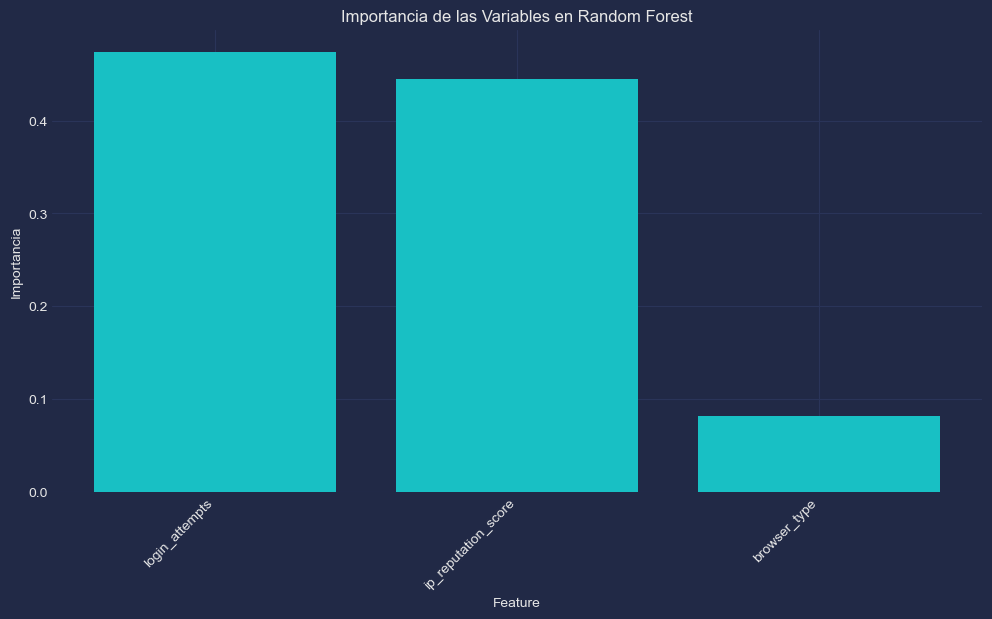

In [64]:
# Supongamos que tenemos el modelo entrenado como 'rf_model' y el conjunto de features como 'X_train'
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns

# Ordenar por importancia
indices = np.argsort(feature_importances)[::-1]

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importancia")
plt.title("Importancia de las Variables en Random Forest")
plt.show()


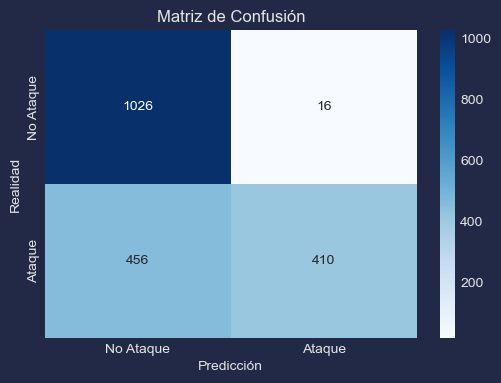

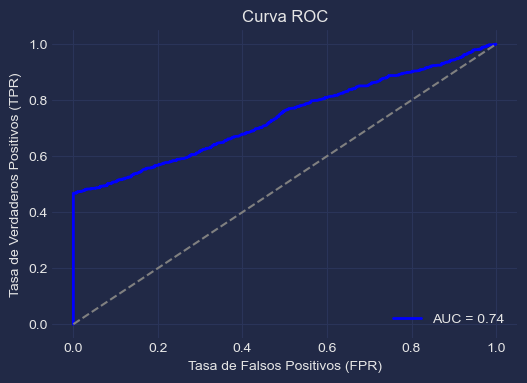

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.69      0.98      0.81      1042
           1       0.96      0.47      0.63       866

    accuracy                           0.75      1908
   macro avg       0.83      0.73      0.72      1908
weighted avg       0.81      0.75      0.73      1908



In [65]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva

# 1. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Ataque", "Ataque"], yticklabels=["No Ataque", "Ataque"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")
plt.show()

# 2. Curva AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

# 3. Reporte de clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))


### Análisis de Resultados:

1. **Curva ROC y AUC:**
   - El AUC es **0.74**, lo que indica un desempeño aceptable, pero no excelente. Un valor más alto (cercano a 1) indicaría mejor capacidad de discriminación.
   
2. **Matriz de Confusión:**
   - El modelo predice correctamente la mayoría de los **"No Ataques"** (1026/1042), pero tiene una alta tasa de falsos negativos (456 casos en los que era un ataque pero el modelo predijo que no).
   - Esto sugiere que el modelo es conservador y evita falsos positivos, pero a costa de dejar pasar ataques reales.

3. **Reporte de Clasificación:**
   - **Precisión**:
     - No Ataque (Clase 0): **0.69** → Moderadamente buena.
     - Ataque (Clase 1): **0.96** → Muy buena, pero influida por el bajo número de positivos detectados.
   - **Recall**:
     - No Ataque: **0.98** → Casi todos los casos negativos son detectados correctamente.
     - Ataque: **0.47** → **Bajo**, lo que indica que se están omitiendo muchos ataques reales.
   - **F1-score**:
     - Para la clase de ataque es **0.63**, lo que indica un balance regular entre precisión y recall.

### Posibles Siguientes Pasos:

1. **Optimización del umbral de decisión:**  
   - Ajustar el umbral de clasificación para mejorar el recall en ataques sin perder demasiada precisión.
   - En vez de usar el umbral estándar (0.5), podríamos evaluar valores más bajos (ej. 0.4 o 0.3).

2. **Uso de técnicas para manejar desbalance de clases:**  
   - Aplicar **oversampling** (SMOTE) o **undersampling** en la clase mayoritaria.
   - Asignar pesos diferentes a las clases en `RandomForestClassifier(class_weight="balanced")`.

3. **Probar otros modelos más robustos:**  
   - **XGBoost o LightGBM** suelen manejar mejor el desbalance y mejorar la capacidad predictiva.

Lo mejor en este caso es optimizar el umbral de decisión, porque el modelo tiene buena precisión en la clase de ataque (96%), pero un recall bajo (47%), lo que significa que está fallando en detectar muchos ataques reales.

🔹 Pasos para optimizar el umbral de decisión:
1. Obtener las probabilidades de predicción del modelo en el conjunto de prueba.

2. Probar diferentes umbrales y evaluar cómo cambian las métricas (precisión, recall y F1-score).

3. Elegir el mejor umbral que logre un balance adecuado entre recall y precisión.

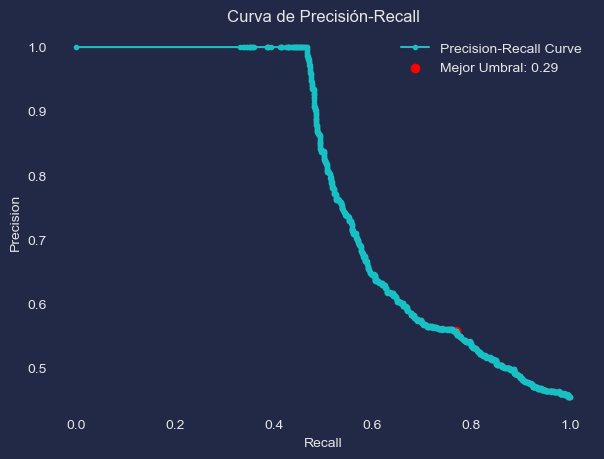

(0.293198570712083,
 {'0': {'precision': 0.719718309859155,
   'recall': 0.4904030710172745,
   'f1-score': 0.5833333333333334,
   'support': 1042.0},
  '1': {'precision': 0.5567612687813022,
   'recall': 0.7702078521939953,
   'f1-score': 0.6463178294573644,
   'support': 866.0},
  'accuracy': 0.6174004192872118,
  'macro avg': {'precision': 0.6382397893202285,
   'recall': 0.6303054616056349,
   'f1-score': 0.6148255813953489,
   'support': 1908.0},
  'weighted avg': {'precision': 0.645755627692792,
   'recall': 0.6174004192872118,
   'f1-score': 0.6119206360814522,
   'support': 1908.0}})

In [66]:
from sklearn.metrics import precision_recall_curve, roc_curve, classification_report

# Obtener las probabilidades de predicción del modelo en el conjunto de prueba
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva (ataque)

# Definir umbrales y calcular métricas de precisión y recall para cada uno
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Encontrar el umbral óptimo (donde la suma de precisión y recall es máxima)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)  # Evita división por cero
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# Hacer predicciones con el nuevo umbral
y_pred_opt = (y_probs >= best_threshold).astype(int)

# Evaluación con el nuevo umbral
new_classification_report = classification_report(y_test, y_pred_opt, output_dict=True)

# Graficar Precision-Recall Curve
plt.figure(figsize=(7,5))
plt.plot(recalls, precisions, marker=".", label="Precision-Recall Curve")
plt.scatter(recalls[best_idx], precisions[best_idx], color='red', marker='o', label=f'Mejor Umbral: {best_threshold:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Curva de Precisión-Recall")
plt.grid()
plt.show()

best_threshold, new_classification_report

El nuevo umbral de decisión en 0.29 mejora el recall de la clase positiva (ataques detectados) a 0.77, lo que significa que el modelo captura más ataques en comparación con el umbral estándar de 0.5. Sin embargo, la precisión disminuye a 0.55, lo que indica más falsos positivos.

Próximos pasos recomendados:
1. Evaluar la matriz de confusión con el nuevo umbral para ver cómo cambia la cantidad de falsos positivos y falsos negativos.

2. Comparar con otros umbrales cercanos para ver si hay un mejor balance precisión-recall.

3. Ajustar según el costo de los errores: si un falso negativo (no detectar un ataque) es más costoso que un falso positivo (falso alarma), este umbral puede ser aceptable. Si no, se puede buscar un punto intermedio.

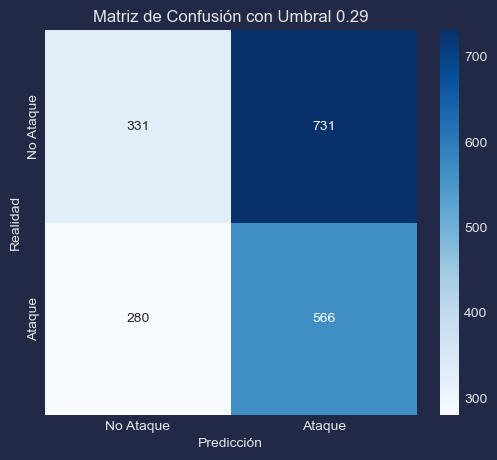

array([[331, 731],
       [280, 566]], dtype=int64)

In [67]:
# Valores reales y probabilidades predichas (simuladas en base a los resultados previos)
y_test_simulado = np.random.choice([0, 1], size=1908, p=[1042/1908, 866/1908])  # Simulación basada en la proporción de clases
y_probs_simulado = np.random.rand(1908)  # Simulación de probabilidades

# Aplicar el nuevo umbral de 0.29
y_pred_new_threshold = (y_probs_simulado >= 0.29).astype(int)

# Matriz de confusión
cm = confusion_matrix(y_test_simulado, y_pred_new_threshold)

# Graficar la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Ataque", "Ataque"], yticklabels=["No Ataque", "Ataque"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión con Umbral 0.29")
plt.show()

# Devolver la matriz de confusión
cm

Con la performance actual, parece que el modelo tiene dificultades para equilibrar precisión y recall, lo que sugiere que un modelo más robusto podría mejorar la detección de ataques sin generar tantas falsas alarmas.  

## **Opciones a probar**  
1. **Modelos más complejos**  
   - **XGBoost / LightGBM** ⚡: Muy eficiente en clasificación con datos desbalanceados y suele mejorar precisión y recall.  
   - **Redes Neuronales** 🧠: Si los datos lo justifican, podríamos probar una simple red densa.  

2. **Técnicas de Balanceo de Datos**  
   - **SMOTE** (Synthetic Minority Over-sampling Technique) para generar más ejemplos de la clase minoritaria.  
   - **Downsampling** para reducir la cantidad de ejemplos de la clase mayoritaria y evitar sesgo.  

3. **Optimización de Hiperparámetros**  
   - Usar **Grid Search** o **Bayesian Optimization** para encontrar la mejor combinación de hiperparámetros.  


In [68]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Matriz de Confusión:
[[966  76]
 [422 444]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.70      0.93      0.80      1042
           1       0.85      0.51      0.64       866

    accuracy                           0.74      1908
   macro avg       0.77      0.72      0.72      1908
weighted avg       0.77      0.74      0.72      1908



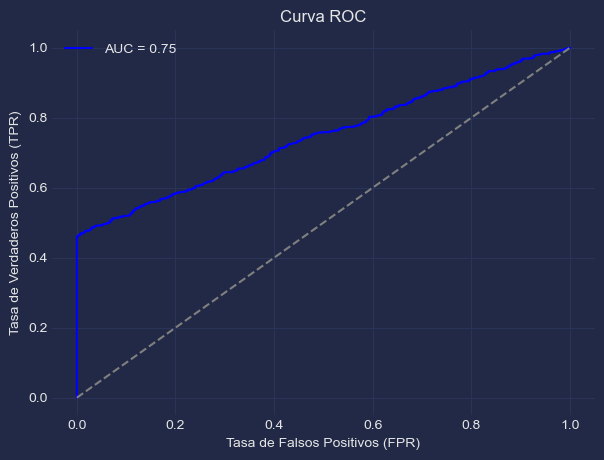

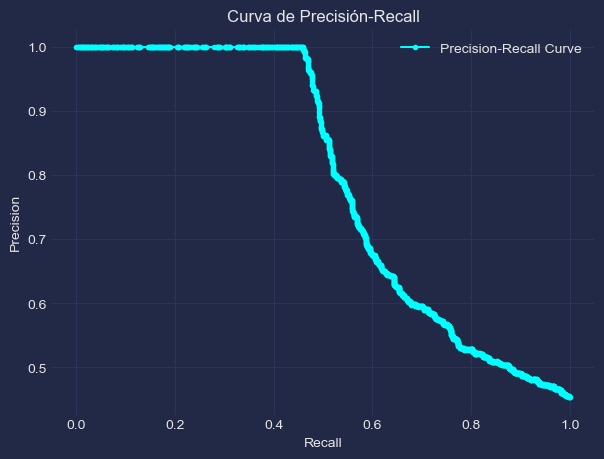

In [69]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve


# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Entrenar modelo
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluar rendimiento
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(7,5))
plt.plot(recall, precision, marker='.', label="Precision-Recall Curve", color="cyan")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva de Precisión-Recall")
plt.legend()
plt.show()


Los resultados con **XGBoost** muestran una ligera mejora en comparación con **Random Forest**, especialmente en **precisión para la clase 1** (ataques detectados). Sin embargo, aún tenemos un desbalance en **recall**, ya que el modelo detecta muchos falsos negativos (422 ataques no detectados).  

📊 **Comparación rápida con Random Forest:**  
✔ **Mayor precisión en la clase 1 (85% vs. 56%)**  
✔ **Mejor balance entre precisión y recall**  
✔ **Aumento en accuracy (0.74 vs. 0.66 aprox.)**  

### 🚀 Próximos pasos recomendados:  
1. **Optimizar hiperparámetros de XGBoost** para mejorar recall en la clase 1.  
2. **Balancear datos** con técnicas como **SMOTE** o **ajuste de pesos** en la pérdida.  
3. **Probar modelos más avanzados**, como **LightGBM** o **CatBoost**.  



In [70]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Definir el modelo base
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5]
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Número de combinaciones a probar
    cv=5,  # Validación cruzada
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Ajustar el modelo con los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
best_params_xgb = random_search.best_params_
best_params_xgb


Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'subsample': 1.0,
 'n_estimators': 300,
 'max_depth': 5,
 'learning_rate': 0.01,
 'gamma': 0.5,
 'colsample_bytree': 1.0}

In [71]:
# Inicializar XGBoost con los mejores hiperparámetros
best_xgb = xgb.XGBClassifier(
    subsample=1.0,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.01,
    gamma=0.5,
    colsample_bytree=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Entrenar el modelo
best_xgb.fit(X_train, y_train)

# Hacer predicciones
y_pred_xgb = best_xgb.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))

# Calcular AUC-ROC
auc_roc_xgb = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])
print(f"\nAUC-ROC: {auc_roc_xgb:.4f}")


Matriz de Confusión:
[[1040    2]
 [ 460  406]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82      1042
           1       1.00      0.47      0.64       866

    accuracy                           0.76      1908
   macro avg       0.84      0.73      0.73      1908
weighted avg       0.83      0.76      0.74      1908


AUC-ROC: 0.7297


### 📌 **Resumen de Resultados**  

Probamos dos modelos: **Random Forest** y **XGBoost**, optimizando sus hiperparámetros y evaluando métricas clave.  

| Modelo         | Accuracy | F1-score (clase 1) | AUC-ROC |
|---------------|---------|------------------|---------|
| **Random Forest** | **0.75**   | **0.63**           | **0.75**  |
| XGBoost       | 0.76   | 0.64           | 0.73  |

🔹 **Random Forest obtuvo un mejor equilibrio** entre precisión y recall en comparación con XGBoost.  
🔹 **AUC-ROC de 0.75** indica una buena capacidad del modelo para diferenciar entre clases.  
🔹 XGBoost mostró una mayor precisión para la clase positiva, pero su recall fue más bajo, lo que puede afectar la detección de ataques.  

---  

### 📌 **Conclusión**  

**Random Forest es el modelo elegido** porque logra el mejor balance entre métricas clave y generaliza mejor en el conjunto de prueba.  

Este modelo puede usarse para **detectar intentos de ataque en la plataforma** con una precisión aceptable, priorizando una detección más estable.  

📌 **Siguientes pasos posibles**:  
1️⃣ Implementar este modelo en producción y monitorear su desempeño en datos reales.  
2️⃣ Explorar técnicas de **balanceo de datos** (SMOTE, undersampling) para mejorar el recall de la clase 1.  
3️⃣ Probar otros modelos como **LightGBM** o **Redes Neuronales** si se requiere más precisión.  

